In [93]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [214]:
h = pd.read_csv('D1216mdif2.csv',index_col=0)
#h.columns = ['ent','mun','Sector','EmpLevel','firmas12','firmas16','diffirmas']
h['Sector']=h['Sector'].astype(int)
h['EmpLevel']=h['EmpLevel'].astype(int)
h['ptot10cum']=h['ptot10cum']/1.123365e+08
#h['ptot15cum']=h['ptot15cum']/1.123365e+08
h.describe()



entmun         Sector       EmpLevel       firmas12  \
count  154665.000000  154665.000000  154665.000000  154665.000000   
mean    19365.572301       5.000000       4.000000      28.381780   
std      7361.375256       2.581997       2.000006     373.872448   
min      1001.000000       1.000000       1.000000       0.000000   
25%     14083.000000       3.000000       2.000000       0.000000   
50%     20230.000000       5.000000       4.000000       0.000000   
75%     24031.000000       7.000000       6.000000       2.000000   
max     32058.000000       9.000000       7.000000   40111.000000   

            firmas16      firmasdif        ptot10           im10  \
count  154665.000000  154665.000000  1.546650e+05  154665.000000   
mean       31.772276       3.390496  4.565865e+04       0.000413   
std       402.039330      47.994908  1.327420e+05       0.999785   
min         0.000000   -2889.000000  9.300000e+01      -2.342000   
25%         0.000000       0.000000  4.263000e+03      -0.760000   
50%         0.000000       0.000000  1.271300e+04      -0.029000   
75%         2.000000       0.000000  3.267700e+04       0.679000   
max     41037.000000    5138.000000  1.815786e+06       4.363000   

             ptot15           im15     ptot10cum          dptot  \
count  1.546650e+05  154665.000000  1.546650e+05  154665.000000   
mean   4.858149e+04       0.000360  1.207250e-01       0.007020   
std    1.390434e+05       0.999943  1.615499e-01       0.021716   
min    8.700000e+01      -2.228000  8.278698e-07      -0.084055   
25%    4.245000e+03      -0.748000  1.159386e-02      -0.001303   
50%    1.329000e+04      -0.073000  5.503330e-02       0.008017   
75%    3.435300e+04       0.643000  1.672426e-01       0.015290   
max    1.827868e+06       5.027000  1.000000e+00       0.636425   

            nacent10    nacotrent10     pob5ymas10    vivotrent10  \
count  154665.000000  154665.000000  154665.000000  154665.000000   
mean       90.399308       8.134379      95.724725       2.255275   
std         9.679783       9.167626       2.570824       2.370886   
min        29.200000      -6.000000      60.200000      -6.000000   
25%        87.900000       2.500000      94.600000       1.000000   
50%        93.400000       5.200000      96.000000       1.800000   
75%        96.500000      10.400000      97.300000       2.900000   
max       100.000000      65.200000     100.000000      38.800000   

             viveu10  
count  154665.000000  
mean        1.283747  
std         1.991641  
min        -6.000000  
25%         0.400000  
50%         1.100000  
75%         2.300000  
max        11.400000

In [215]:
h.head()

entmun  Sector  EmpLevel  firmas12  firmas16  firmasdif    ptot10   im10  \
0  1001.0       1         1       5.0        17       12.0  797010.0 -1.768   
1  1001.0       1         2       4.0         0       -4.0  797010.0 -1.768   
2  1001.0       1         3       1.0         0       -1.0  797010.0 -1.768   
3  1001.0       1         4       1.0         0       -1.0  797010.0 -1.768   
4  1001.0       1         5       0.0         0        0.0  797010.0 -1.768   

     ptot15   im15  ptot10cum    dptot  nacent10  nacotrent10  pob5ymas10  \
0  877190.0 -1.676   0.809396  0.02012      75.3         23.5        94.1   
1  877190.0 -1.676   0.809396  0.02012      75.3         23.5        94.1   
2  877190.0 -1.676   0.809396  0.02012      75.3         23.5        94.1   
3  877190.0 -1.676   0.809396  0.02012      75.3         23.5        94.1   
4  877190.0 -1.676   0.809396  0.02012      75.3         23.5        94.1   

   vivotrent10  viveu10  
0          4.6      0.9  
1          4.6      0.9  
2          4.6      0.9  
3          4.6      0.9  
4          4.6      0.9

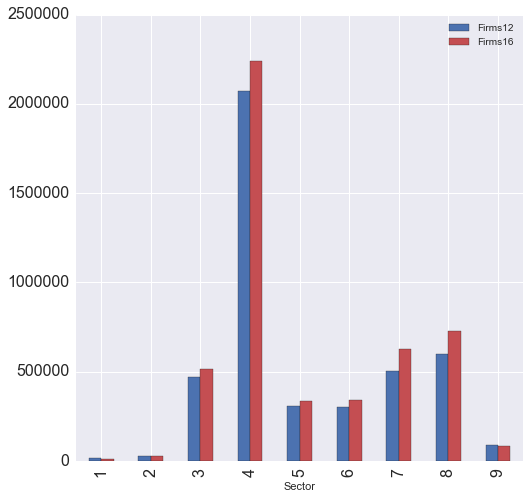

In [226]:
#aa=aa['firmas12','firmas16','Sector']
h.Sector.apply(lambda x:int(x))

aa=pd.pivot_table(h, values=['firmas12','firmas16'], index=h.Sector, aggfunc='sum')
aa.columns=['Firms12','Firms16']
s = pd.Series(['0','Ag, Forest, Fisheries','Mining','Manufacture','Construction','Energy Water','Trade, Restaurants, Hotels','Transport, Warehousing','Finance, Insurace, Realtors','Communitary, Social'])  
aa['SectorName']=s
#aa=aa['firms12','firms16'].set_index(aa.SectorName)
#aa.reset_index()
#aa
#aa['Sector']=s
aa.plot(kind='bar',color=['b','r'], fontsize=16)


In [203]:
s = pd.Series(['Sector','Ag, Forest, Fisheries','Mining','Manufacture','Construction','Energy Water','Trade, Restaurants, Hotels','Transport, Warehousing','Finance, Insurace, Realtors','Communitary, Social'])  
ss=s.to_frame()
ss.colums=['Sector']
ss

0
0                       Sector
1        Ag, Forest, Fisheries
2                       Mining
3                  Manufacture
4                 Construction
5                 Energy Water
6   Trade, Restaurants, Hotels
7       Transport, Warehousing
8  Finance, Insurace, Realtors
9          Communitary, Social

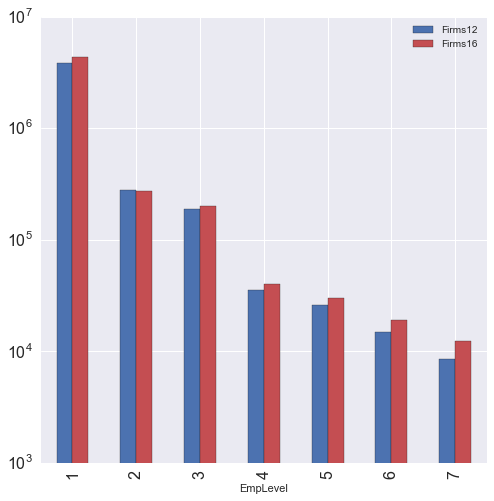

In [227]:
#aa=aa['firmas12','firmas16','Sector']
aa=pd.pivot_table(h, values=['firmas12','firmas16'], index=h.EmpLevel, aggfunc='sum')
aa.columns=['Firms12','Firms16']
s = pd.Series(['0','[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]'])  
aa['EmpRange']=s
#aa=aa['firms12','firms16'].set_index(aa.SectorName)
#aa.reset_index()
#aa
#aa['Sector']=s
aa.plot(kind='bar',color=['b','r'],logy=True, fontsize=16)

In [207]:
s = pd.Series(['Employment Range','[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]'])  
ss=s.to_frame()
ss.colums=['Sector']
ss

0
0  Employment Range
1             [1,5]
2            [6,10]
3           [11,30]
4           [31,50]
5          [51,100]
6         [101,250]
7           [251,+]

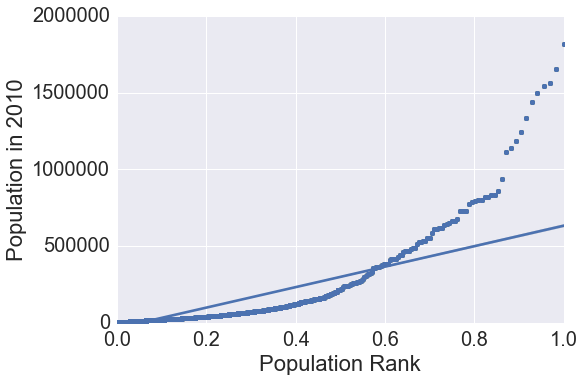

In [266]:
#plt.scatter([h.nacent10, h.ptot10])
sns.set(font_scale=2)
fig=sns.regplot(x=h.ptot10cum, y=h.ptot10)
sns.plt.xlim(0,)
fig.set_xlabel('Population Rank')
#, fontsize=16)
fig.set_ylabel('Population in 2010')
#, fontsize=16)
plt.ylim(0,)
plt.xlim(0,1.0)

plt.show()


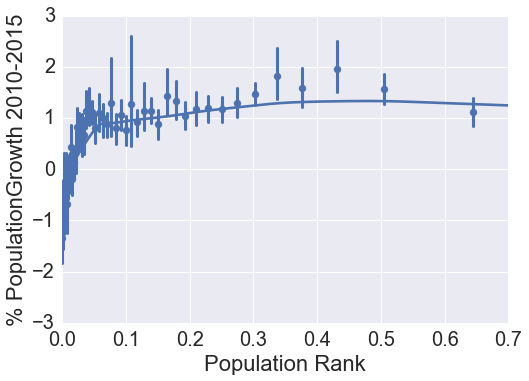

In [268]:
p= pd.read_csv('pobmuncum1015.csv',index_col=0)

p['lptot10']=p.ptot10.apply(lambda x: np.log(x))
p['lptot15']=p.ptot15.apply(lambda x: np.log(x))
p['popgrowth10_15']=100*(p.lptot15-p.lptot10)/5
p['ptot10cum']=p['ptot10cum']/1.123365e+08

#sns.regplot(x=p.lpop10cum, y=p.lpop15cum)
sns.set(font_scale=2)

fig=sns.regplot(x=p.ptot10cum, y=p.popgrowth10_15,x_bins=50,lowess=True)
#fig=sns.distplot(p.popgrowth10_15)
plt.xlim(0,)
fig.set_xlabel('Population Rank')
#, fontsize=16
fig.set_ylabel('% PopulationGrowth 2010-2015')
#, fontsize=16
plt.show()
#"Population Rank", 

In [82]:
p.head()

ent  mun  ptot10   im10  ptot15   im15  ptot10cum  ptot10cumD     dptot  \
0    1    1  797010 -1.768  877190 -1.676   90924681    22208867  0.020120   
1    1    2   45492 -0.463   46464 -0.565   25574100    86807930  0.004273   
2    1    3   54136 -0.754   56048 -0.698   28511764    83878910  0.007064   
3    1    4   15042 -0.648   15577 -0.674    7767897   104583683  0.007113   
4    1    5   99590 -1.262  120405 -1.256   41184951    71251177  0.041801   

   ptot15cum  ptot15cumD    lptot10    lptot15  popgrowth10_15  
0     550293   118944005  13.588623  13.684479        0.019171  
1   10674945   108836110  10.725292  10.746433        0.004228  
2   49019842    70617947  10.899255  10.933964        0.006942  
3   17573407   101948475   9.618602   9.653551        0.006990  
4   10462893   109047904  11.508817  11.698616        0.037960

In [85]:
p['entmun']=1000*p['ent']+p['mun']
aa=p[['entmun','ptot15cum']]
hm=pd.merge(h, aa, how='outer', on='entmun')
hm.head()


entmun  Sector  EmpLevel  firmas12  firmas16  firmasdif    ptot10   im10  \
0  1001.0     1.0       1.0       5.0      17.0       12.0  797010.0 -1.768   
1  1001.0     1.0       2.0       4.0       0.0       -4.0  797010.0 -1.768   
2  1001.0     1.0       3.0       1.0       0.0       -1.0  797010.0 -1.768   
3  1001.0     1.0       4.0       1.0       0.0       -1.0  797010.0 -1.768   
4  1001.0     1.0       5.0       0.0       0.0        0.0  797010.0 -1.768   

     ptot15   im15    ...      nacotrent10  pob5ymas10  vivotrent10  viveu10  \
0  877190.0 -1.676    ...             23.5        94.1          4.6      0.9   
1  877190.0 -1.676    ...             23.5        94.1          4.6      0.9   
2  877190.0 -1.676    ...             23.5        94.1          4.6      0.9   
3  877190.0 -1.676    ...             23.5        94.1          4.6      0.9   
4  877190.0 -1.676    ...             23.5        94.1          4.6      0.9   

   row  col  logfirms12  logfirms16  diflogfirms  ptot15cum  
0  1.0  1.0    1.791759    2.890372     0.274653     550293  
1  1.0  1.0    1.609438    0.000000    -0.402359     550293  
2  1.0  1.0    0.693147    0.000000    -0.173287     550293  
3  1.0  1.0    0.693147    0.000000    -0.173287     550293  
4  1.0  1.0    0.000000    0.000000     0.000000     550293  

[5 rows x 23 columns]

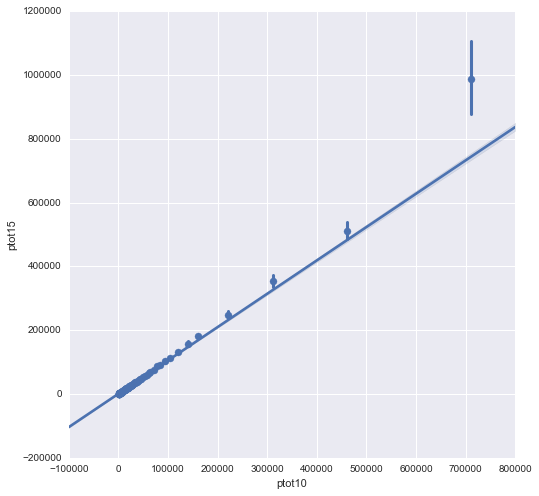

In [102]:
fig=sns.regplot(x=p.ptot10, y=p.ptot15,x_bins=100)


In [9]:
#!pip install palettable
from palettable.colorbrewer.qualitative import Accent_7
pal=Accent_7.mpl_colors
pal

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]

In [ ]:
#Consultar Palettes en https://jiffyclub.github.io/palettable/  (Set1, Accent, etc.)
hm=h
hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))
hm['logfirms12']=hm.firmas12.apply(lambda x: np.log(1+x))
#pal = dict(1='seagreen',2='y',3='m',4='c',5='r',6='g',7='b')
sns.set(font_scale=2)

fig=sns.lmplot(x="ptot10cum", y="logfirms12", hue="EmpLevel", data=hm,palette="Accent",lowess=True,row='row',col='col')
#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Population Rank", "Log(1 + Firms 2012)")

In [11]:
#import matplotlib.colors as col
#col.ListedColormap([ (1.0, 1.0, 0.6), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)], name='pal', N=None)
pal

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]

In [12]:
pal2=[(1.0, 1.0, 0.6),(0.2196078431372549, 0.4235294117647059, 0.6901960784313725),(0.9411764705882353, 0.00784313725490196, 0.4980392156862745),(0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]    

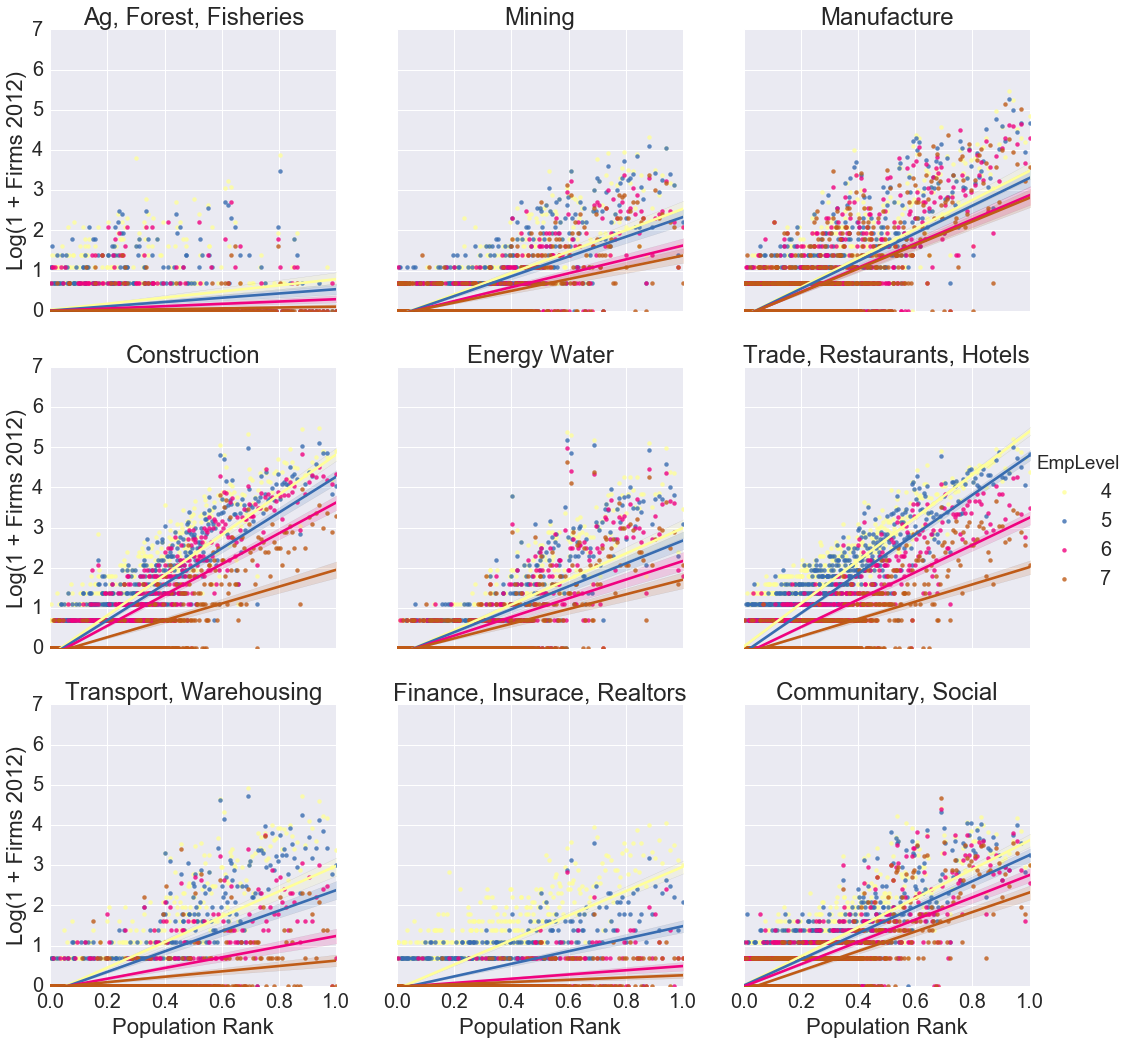

In [269]:
#pal=sns.color_palette() ; antes sirvio. El lowess aqui no funciona para la mayoria de los casos
hm=h
hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))
hm['logfirms12']=hm.firmas12.apply(lambda x: np.log(1+x))
#pal = dict(str(1)='seagreen',str(2)='y',str(3)='m',str(4)='c',str(5)='r',str(6)='g',str(7)='b')
#palette="Set1"
sns.set(font_scale=2)

fig=sns.lmplot(x="ptot10cum", y="logfirms12", hue="EmpLevel", data=hm[hm.EmpLevel>3],row='row',col='col',palette=pal2) 
sns.plt.xlim(0,1.0)
sns.plt.ylim(0,)


#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Population Rank", "Log(1 + Firms 2012)")

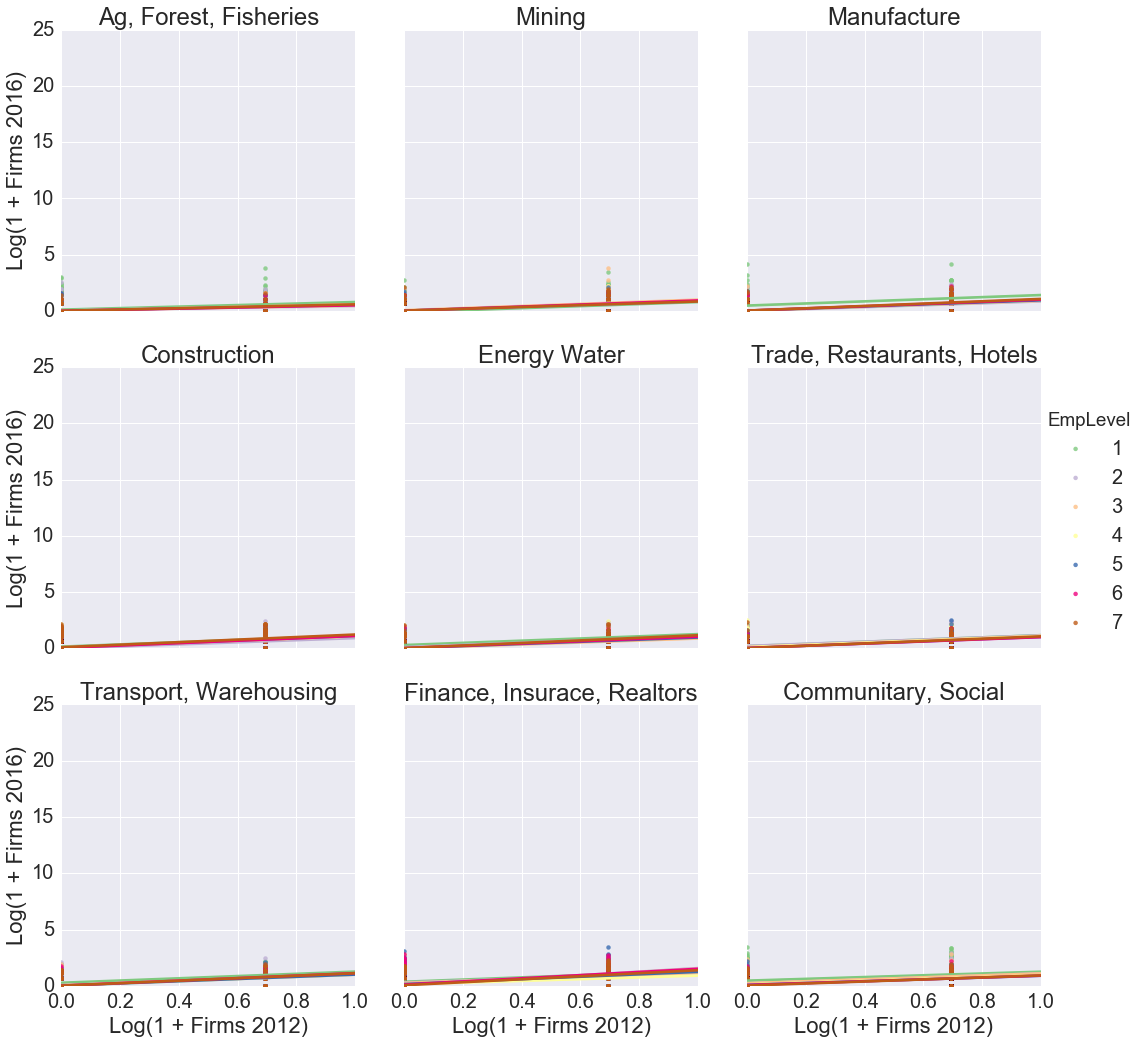

In [270]:
#Consultar Palettes en https://jiffyclub.github.io/palettable/  (Set1, Accent, etc.)
hm=h
hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))
hm['diflogfirms']=(hm.logfirms16-hm.logfirms12)/4
sns.set(font_scale=2)

#pal = dict(1='seagreen',2='y',3='m',4='c',5='r',6='g',7='b')
fig=sns.lmplot(x="logfirms12", y="logfirms16", hue="EmpLevel", data=hm,palette="Accent",row='row',col='col')
sns.plt.xlim(0,1.0)
sns.plt.ylim(0,)

#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')
sns.plt.xlim(0,)

fig = fig.set_axis_labels("Log(1 + Firms 2012)", "Log(1 + Firms 2016)")

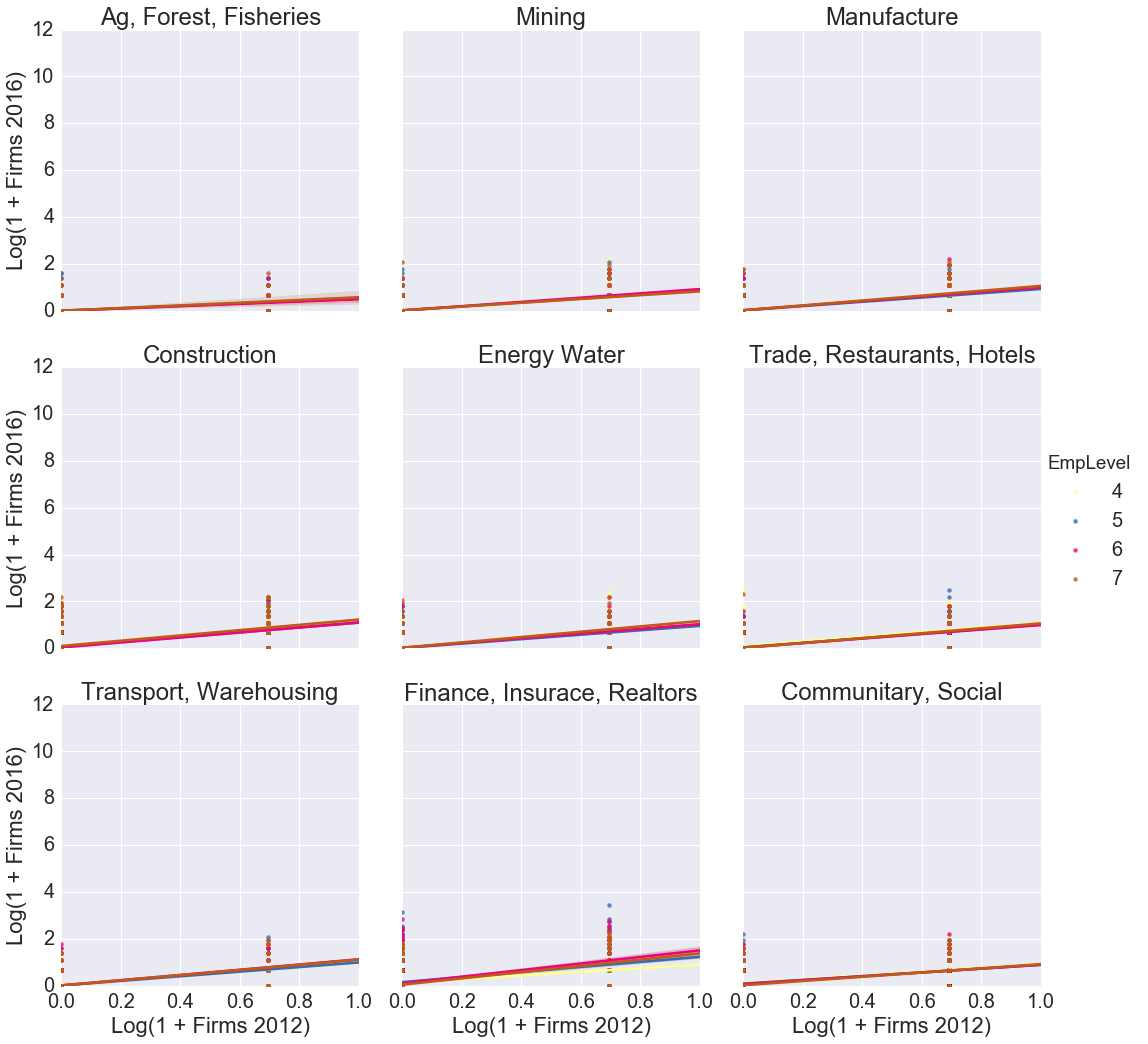

In [271]:
fig=sns.lmplot(x="logfirms12", y="logfirms16", hue="EmpLevel", data=hm[hm.EmpLevel>3],palette=pal2,row='row',col='col')
sns.plt.xlim(0,1.0)
sns.plt.ylim(0,)

sns.set(font_scale=2)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Log(1 + Firms 2012)", "Log(1 + Firms 2016)")

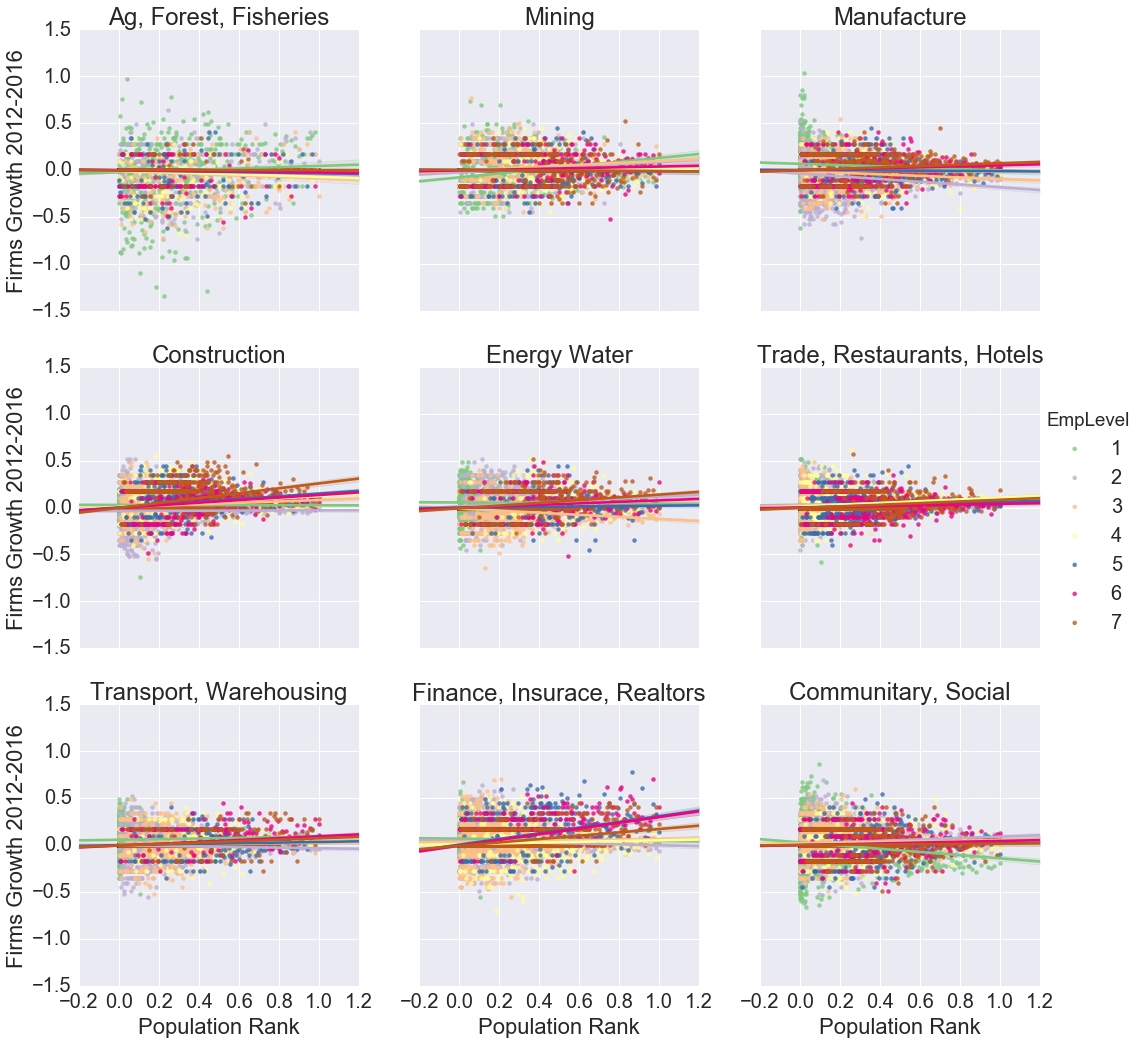

In [238]:
#Consultar Palettes en https://jiffyclub.github.io/palettable/  (Set1, Accent, etc.)
hm=h
hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))
hm['diflogfirms']=(hm.logfirms16-hm.logfirms12)/4

#pal = dict(1='seagreen',2='y',3='m',4='c',5='r',6='g',7='b')
fig=sns.lmplot(x="ptot10cum", y="diflogfirms", hue="EmpLevel", data=hm,palette="Accent",row='row',col='col')
sns.plt.xlim(0,1.0)
sns.plt.ylim(0,)

#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Population Rank", "Firms Growth 2012-2016")

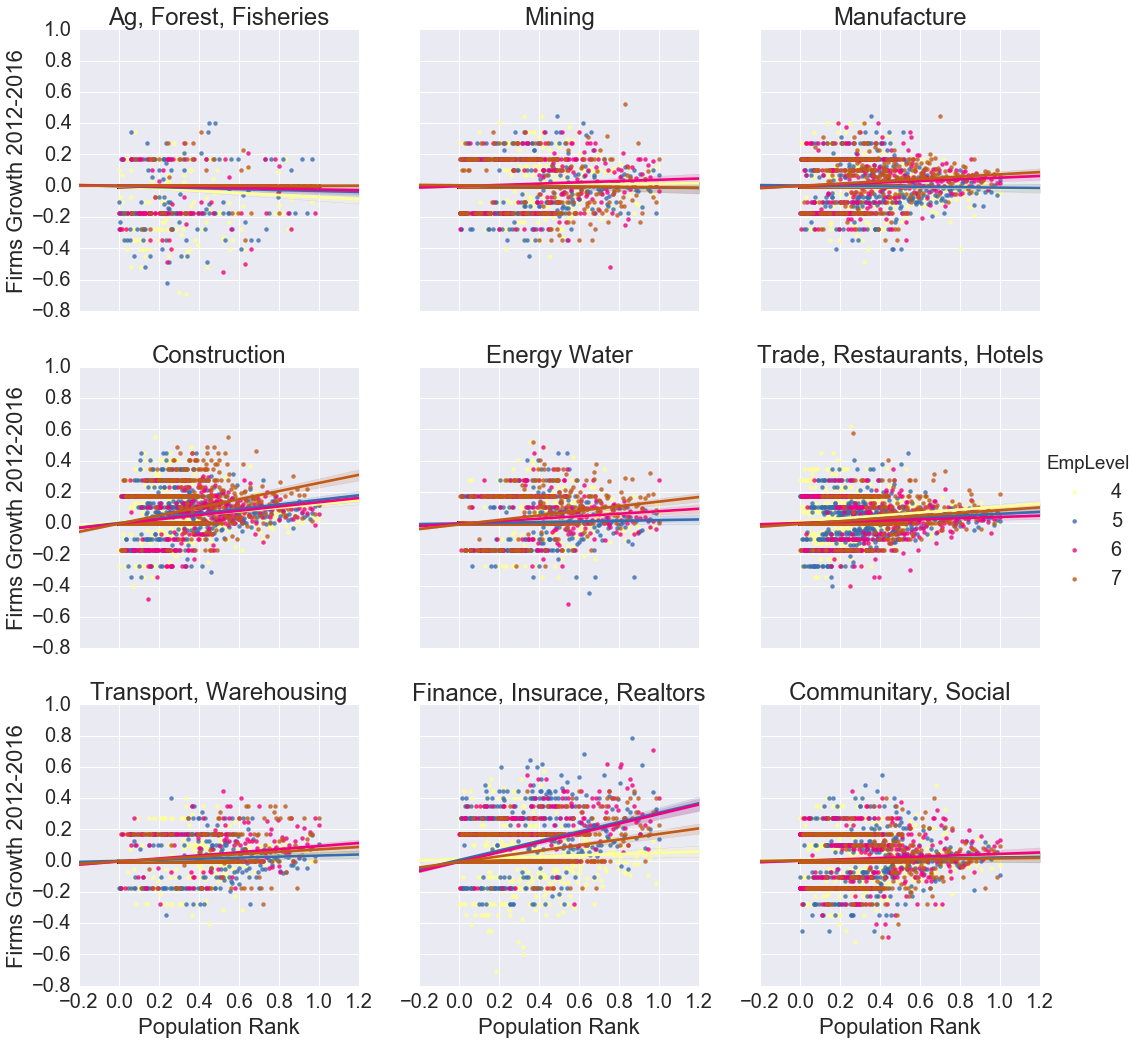

In [239]:
fig=sns.lmplot(x="ptot10cum", y="diflogfirms", hue="EmpLevel", data=hm[hm.EmpLevel>3],row='row',col='col',palette=pal2) 
sns.plt.xlim(0,1.0)
sns.plt.ylim(0,)

#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Population Rank", "Firms Growth 2012-2016")


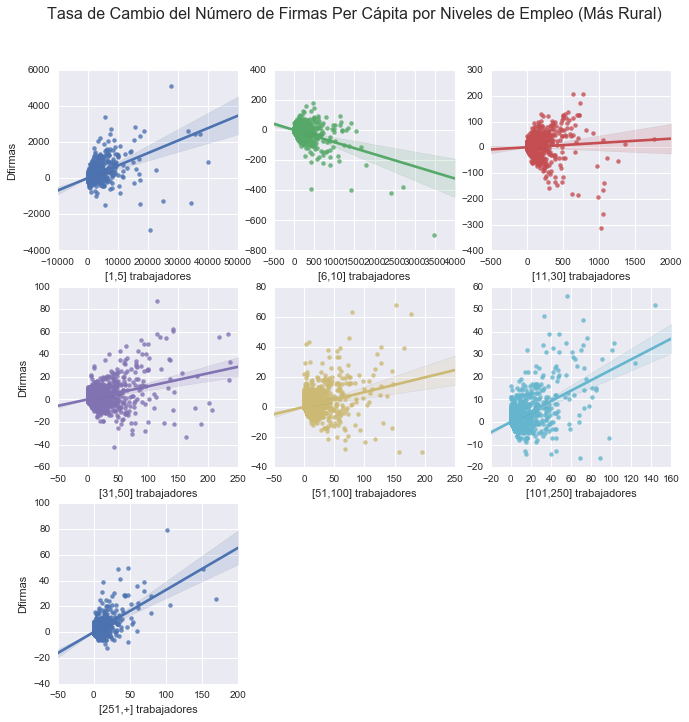

In [94]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Niveles de Empleo (Más Rural)", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].firmas12, y=hm[(hm.EmpLevel==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].firmas12, y=hm[(hm.EmpLevel==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].firmas12, y=hm[(hm.EmpLevel==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].firmas12, y=hm[(hm.EmpLevel==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].firmas12, y=hm[(hm.EmpLevel==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].firmas12, y=hm[(hm.EmpLevel==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].firmas12, y=hm[(hm.EmpLevel==7)].firmasdif,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

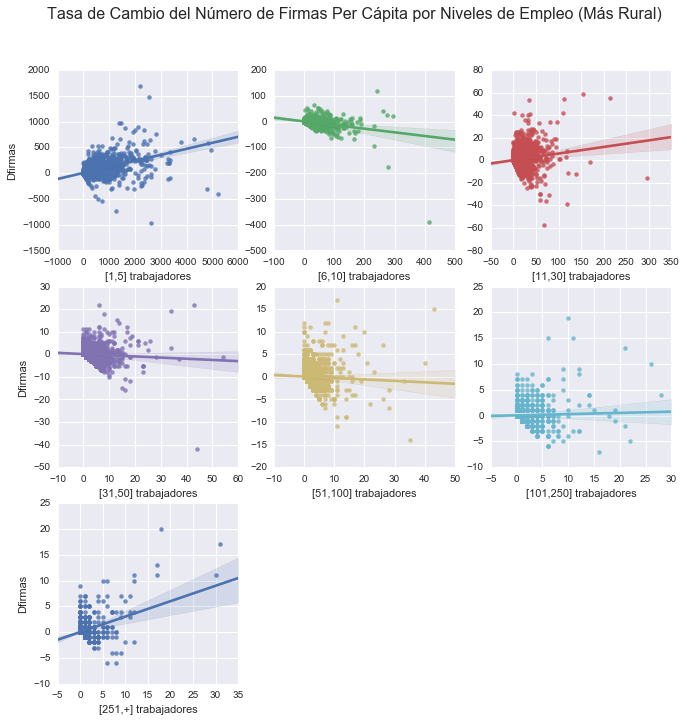

In [52]:
hm=h[h.ptot10cum<50000000]
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Niveles de Empleo (Más Rural)", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].firmas12, y=hm[(hm.EmpLevel==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].firmas12, y=hm[(hm.EmpLevel==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].firmas12, y=hm[(hm.EmpLevel==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].firmas12, y=hm[(hm.EmpLevel==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].firmas12, y=hm[(hm.EmpLevel==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].firmas12, y=hm[(hm.EmpLevel==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].firmas12, y=hm[(hm.EmpLevel==7)].firmasdif,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

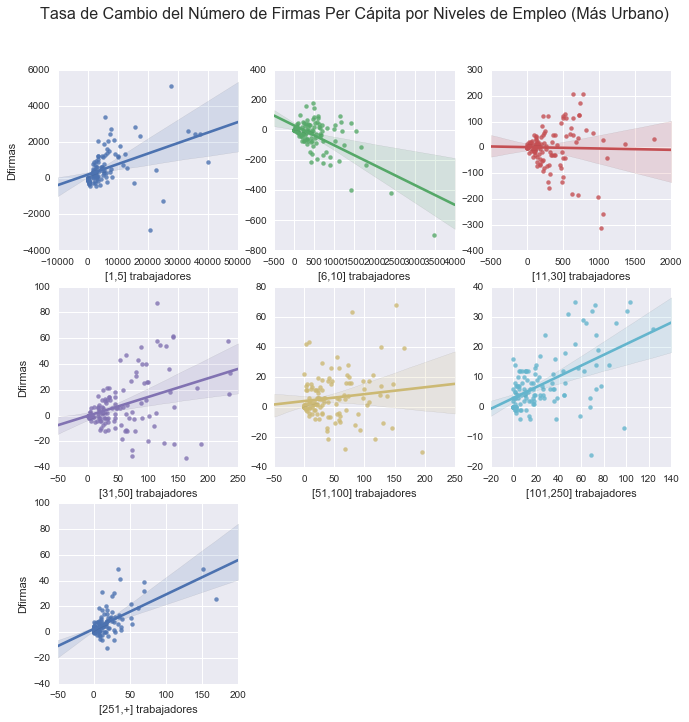

In [54]:
hm=h[(h.ptot10cum>=95000000)]
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Niveles de Empleo (Más Urbano)", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].firmas12, y=hm[(hm.EmpLevel==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].firmas12, y=hm[(hm.EmpLevel==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].firmas12, y=hm[(hm.EmpLevel==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].firmas12, y=hm[(hm.EmpLevel==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].firmas12, y=hm[(hm.EmpLevel==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].firmas12, y=hm[(hm.EmpLevel==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].firmas12, y=hm[(hm.EmpLevel==7)].firmasdif,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

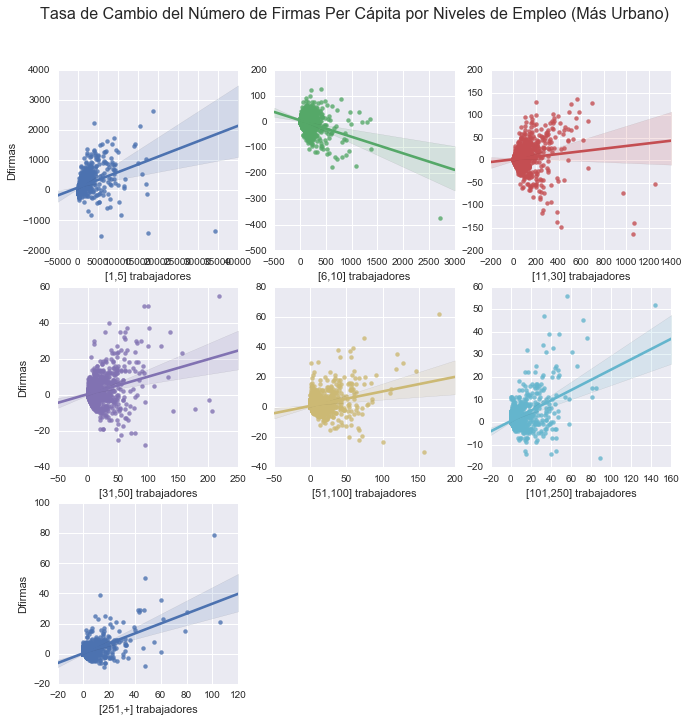

In [55]:
hm=h[(h.ptot10cum>50000000)&(h.ptot10cum<95000000)]
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Niveles de Empleo (Más Urbano)", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].firmas12, y=hm[(hm.EmpLevel==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].firmas12, y=hm[(hm.EmpLevel==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].firmas12, y=hm[(hm.EmpLevel==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].firmas12, y=hm[(hm.EmpLevel==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].firmas12, y=hm[(hm.EmpLevel==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].firmas12, y=hm[(hm.EmpLevel==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].firmas12, y=hm[(hm.EmpLevel==7)].firmasdif,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

In [29]:
hm.describe()

entmun       Sector    EmpLevel      firmas12      firmas16  \
count   4347.000000  4347.000000  4347.00000   4347.000000   4347.000000   
mean   15139.971014     5.000000     4.00000    469.962733    511.727398   
std     7472.732095     2.582286     2.00023   2037.244272   2178.865928   
min     1001.000000     1.000000     1.00000      0.000000      0.000000   
25%     9013.000000     3.000000     2.00000      5.000000      7.000000   
50%    15033.000000     5.000000     4.00000     28.000000     32.000000   
75%    19039.000000     7.000000     6.00000    138.000000    132.000000   
max    31050.000000     9.000000     7.00000  40111.000000  41037.000000   

         firmasdif        ptot10         im10        ptot15         im15  \
count  4347.000000  4.347000e+03  4347.000000  4.347000e+03  4347.000000   
mean     41.764665  6.987450e+05    -1.701174  7.350789e+05    -1.611638   
std     247.918634  3.546453e+05     0.252725  3.581990e+05     0.253248   
min   -2889.000000  3.576450e+05    -2.342000  3.615930e+05    -2.228000   
25%      -2.000000  4.384340e+05    -1.881000  4.808410e+05    -1.765000   
50%       2.000000  6.081140e+05    -1.665000  6.462020e+05    -1.588000   
75%      12.000000  8.019400e+05    -1.575000  8.771900e+05    -1.478000   
max    5138.000000  1.815786e+06    -0.872000  1.827868e+06    -0.768000   

          nacent10  nacotrent10   pob5ymas10  vivotrent10      viveu10  
count  4347.000000  4347.000000  4347.000000  4347.000000  4347.000000  
mean     72.398551    24.300000    94.595652     3.904348     0.623188  
std      15.401287    15.111702     2.689495     2.428044     0.459146  
min      33.300000     7.100000    82.800000     1.400000     0.100000  
25%      62.500000    13.200000    94.100000     2.500000     0.300000  
50%      78.300000    18.800000    95.400000     3.100000     0.400000  
75%      84.300000    31.600000    96.100000     4.300000     0.900000  
max      91.400000    61.800000    97.100000    15.400000     2.100000

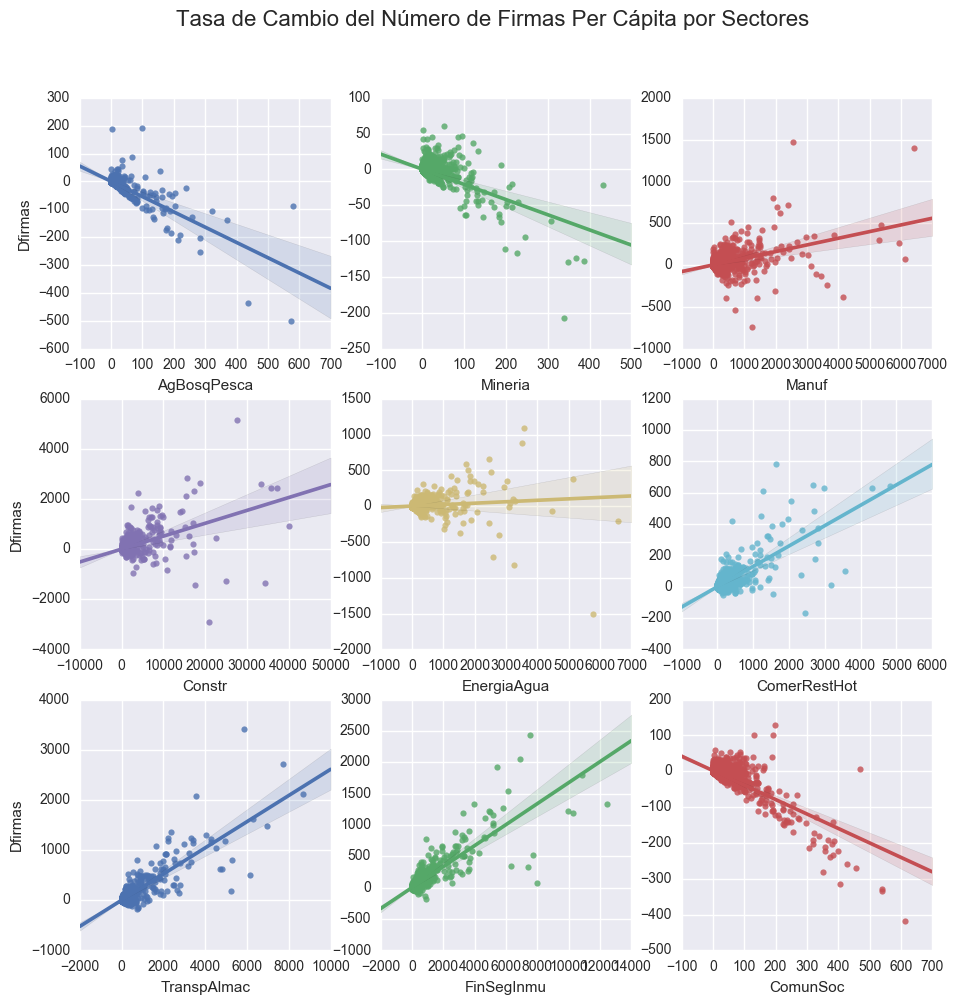

In [18]:
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Sectores", fontsize=16)
sns.regplot(x=hm[(hm.Sector==1)].firmas12, y=hm[(hm.Sector==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.Sector==2)].firmas12, y=hm[(hm.Sector==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.Sector==3)].firmas12, y=hm[(hm.Sector==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.Sector==4)].firmas12, y=hm[(hm.Sector==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.Sector==5)].firmas12, y=hm[(hm.Sector==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.Sector==6)].firmas12, y=hm[(hm.Sector==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.Sector==7)].firmas12, y=hm[(hm.Sector==7)].firmasdif,ax=axes[2,0])
sns.regplot(x=hm[(hm.Sector==8)].firmas12, y=hm[(hm.Sector==8)].firmasdif,ax=axes[2,1])
sns.regplot(x=hm[(hm.Sector==9)].firmas12, y=hm[(hm.Sector==9)].firmasdif,ax=axes[2,2])

axes[0,0].set_xlabel('AgBosqPesca')
axes[0,1].set_xlabel('Mineria')
axes[0,2].set_xlabel('Manuf')
axes[1,0].set_xlabel('Constr')
axes[1,1].set_xlabel('EnergiaAgua')
axes[1,2].set_xlabel('ComerRestHot')
axes[2,0].set_xlabel('TranspAlmac')
axes[2,1].set_xlabel('FinSegInmu')
axes[2,2].set_xlabel('ComunSoc')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')
axes[2,1].set_ylabel('')
axes[2,2].set_ylabel('')

plt.show()

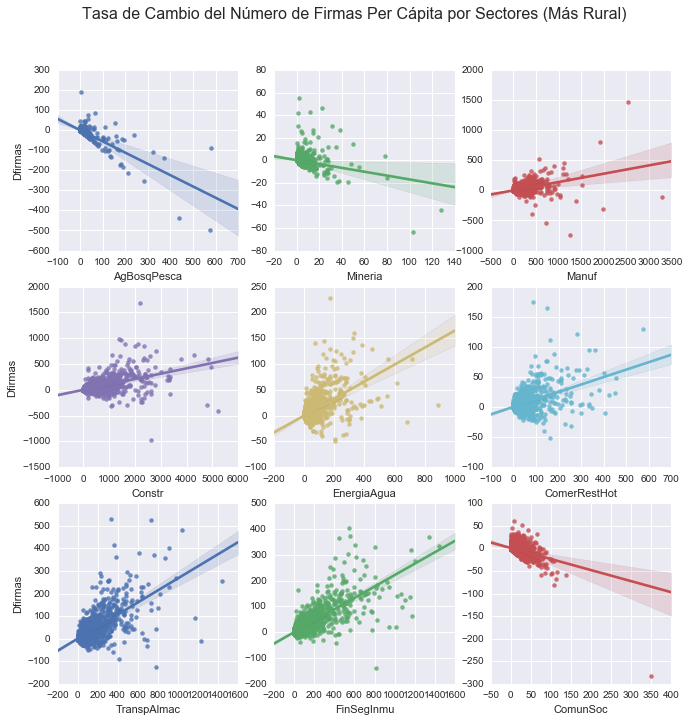

In [56]:
hm=h[h.ptot10cum<50000000]
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Sectores (Más Rural)", fontsize=16)
sns.regplot(x=hm[(hm.Sector==1)].firmas12, y=hm[(hm.Sector==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.Sector==2)].firmas12, y=hm[(hm.Sector==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.Sector==3)].firmas12, y=hm[(hm.Sector==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.Sector==4)].firmas12, y=hm[(hm.Sector==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.Sector==5)].firmas12, y=hm[(hm.Sector==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.Sector==6)].firmas12, y=hm[(hm.Sector==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.Sector==7)].firmas12, y=hm[(hm.Sector==7)].firmasdif,ax=axes[2,0])
sns.regplot(x=hm[(hm.Sector==8)].firmas12, y=hm[(hm.Sector==8)].firmasdif,ax=axes[2,1])
sns.regplot(x=hm[(hm.Sector==9)].firmas12, y=hm[(hm.Sector==9)].firmasdif,ax=axes[2,2])

axes[0,0].set_xlabel('AgBosqPesca')
axes[0,1].set_xlabel('Mineria')
axes[0,2].set_xlabel('Manuf')
axes[1,0].set_xlabel('Constr')
axes[1,1].set_xlabel('EnergiaAgua')
axes[1,2].set_xlabel('ComerRestHot')
axes[2,0].set_xlabel('TranspAlmac')
axes[2,1].set_xlabel('FinSegInmu')
axes[2,2].set_xlabel('ComunSoc')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')
axes[2,1].set_ylabel('')
axes[2,2].set_ylabel('')

plt.show()

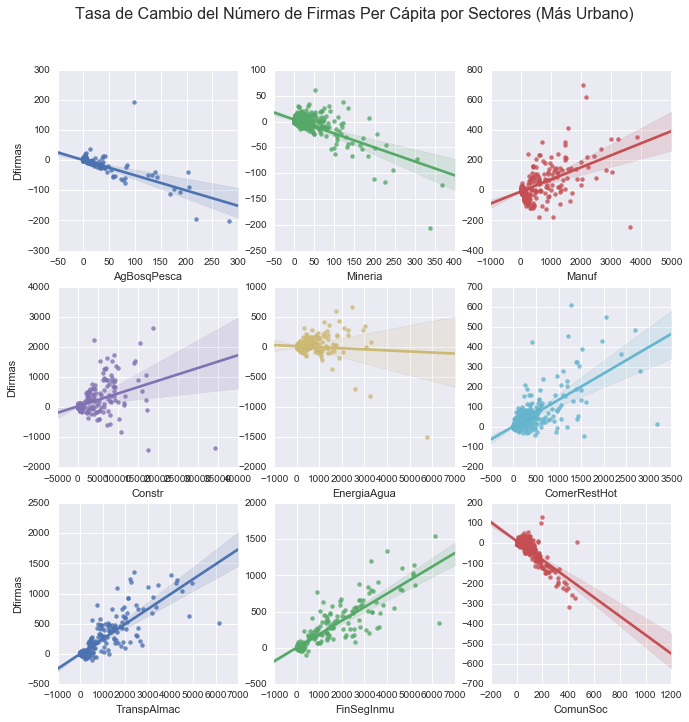

In [57]:
hm=h[(h.ptot10cum>0.47)&(h.ptot10cum<0.87)]

fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Sectores (Más Urbano)", fontsize=16)
sns.regplot(x=hm[(hm.Sector==1)].firmas12, y=hm[(hm.Sector==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.Sector==2)].firmas12, y=hm[(hm.Sector==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.Sector==3)].firmas12, y=hm[(hm.Sector==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.Sector==4)].firmas12, y=hm[(hm.Sector==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.Sector==5)].firmas12, y=hm[(hm.Sector==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.Sector==6)].firmas12, y=hm[(hm.Sector==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.Sector==7)].firmas12, y=hm[(hm.Sector==7)].firmasdif,ax=axes[2,0])
sns.regplot(x=hm[(hm.Sector==8)].firmas12, y=hm[(hm.Sector==8)].firmasdif,ax=axes[2,1])
sns.regplot(x=hm[(hm.Sector==9)].firmas12, y=hm[(hm.Sector==9)].firmasdif,ax=axes[2,2])

axes[0,0].set_xlabel('AgBosqPesca')
axes[0,1].set_xlabel('Mineria')
axes[0,2].set_xlabel('Manuf')
axes[1,0].set_xlabel('Constr')
axes[1,1].set_xlabel('EnergiaAgua')
axes[1,2].set_xlabel('ComerRestHot')
axes[2,0].set_xlabel('TranspAlmac')
axes[2,1].set_xlabel('FinSegInmu')
axes[2,2].set_xlabel('ComunSoc')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')
axes[2,1].set_ylabel('')
axes[2,2].set_ylabel('')

plt.show()

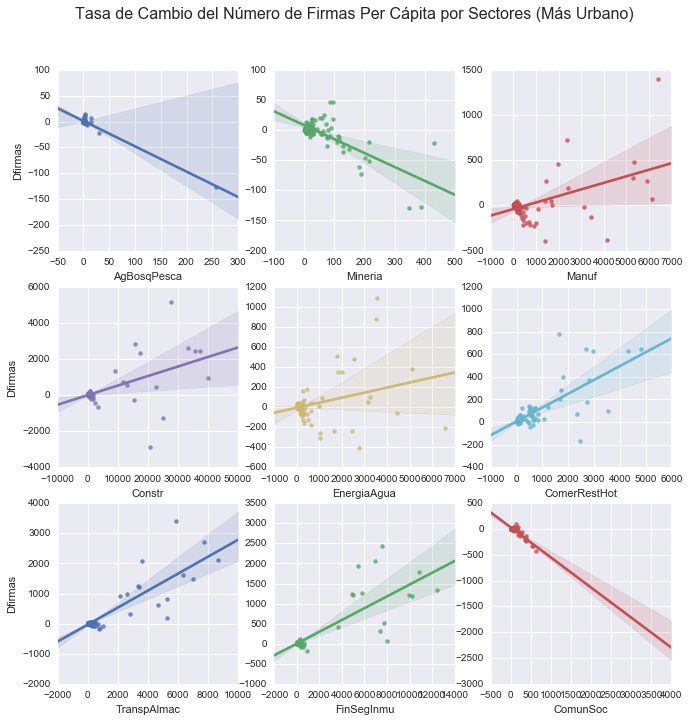

In [58]:
hm=h[(h.ptot10cum>=0.87)]

fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas Per Cápita por Sectores (Más Urbano)", fontsize=16)
sns.regplot(x=hm[(hm.Sector==1)].firmas12, y=hm[(hm.Sector==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.Sector==2)].firmas12, y=hm[(hm.Sector==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.Sector==3)].firmas12, y=hm[(hm.Sector==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.Sector==4)].firmas12, y=hm[(hm.Sector==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.Sector==5)].firmas12, y=hm[(hm.Sector==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.Sector==6)].firmas12, y=hm[(hm.Sector==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.Sector==7)].firmas12, y=hm[(hm.Sector==7)].firmasdif,ax=axes[2,0])
sns.regplot(x=hm[(hm.Sector==8)].firmas12, y=hm[(hm.Sector==8)].firmasdif,ax=axes[2,1])
sns.regplot(x=hm[(hm.Sector==9)].firmas12, y=hm[(hm.Sector==9)].firmasdif,ax=axes[2,2])

axes[0,0].set_xlabel('AgBosqPesca')
axes[0,1].set_xlabel('Mineria')
axes[0,2].set_xlabel('Manuf')
axes[1,0].set_xlabel('Constr')
axes[1,1].set_xlabel('EnergiaAgua')
axes[1,2].set_xlabel('ComerRestHot')
axes[2,0].set_xlabel('TranspAlmac')
axes[2,1].set_xlabel('FinSegInmu')
axes[2,2].set_xlabel('ComunSoc')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')
axes[2,1].set_ylabel('')
axes[2,2].set_ylabel('')

plt.show()

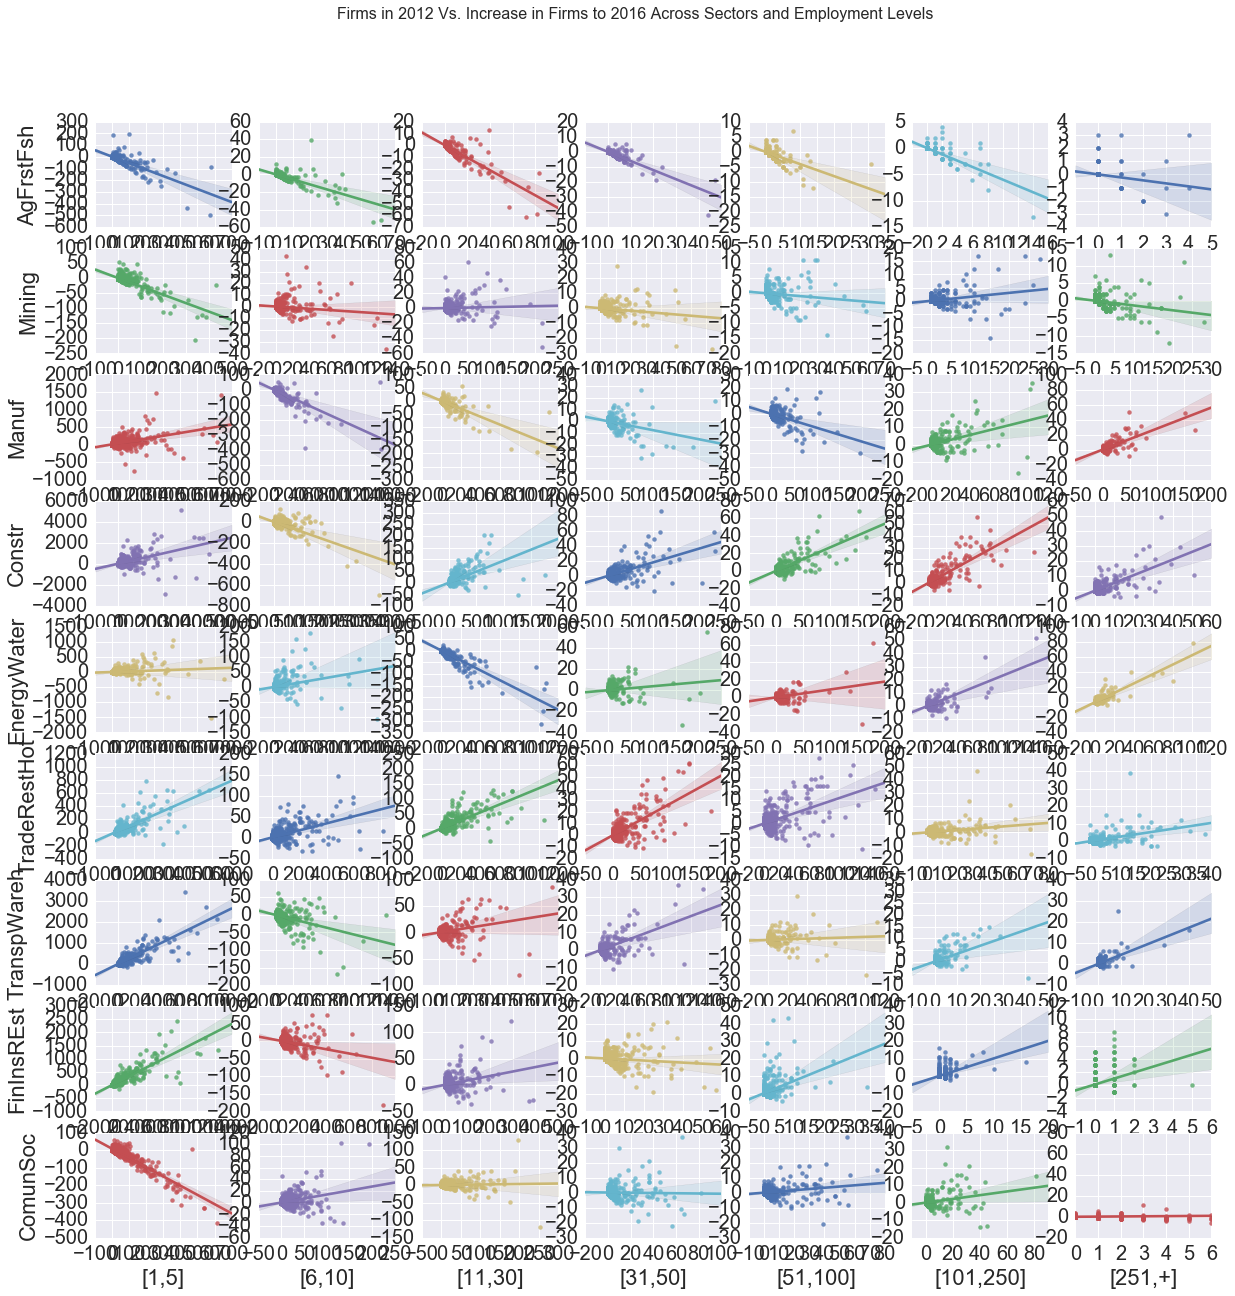

In [259]:
hm=h 

fig, axes = plt.subplots(9,7,figsize=(20,20))

fig.suptitle("Firms in 2012 Vs. Increase in Firms to 2016 Across Sectors and Employment Levels", fontsize=16)
for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        aaa=hm[(hm.Sector==sss)&(hm.EmpLevel==eee)]
        sns.regplot(x=aaa.firmas12, y=aaa.firmasdif,ax = axes[ss,ee])
        sns.plt.xlim(0,)
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()

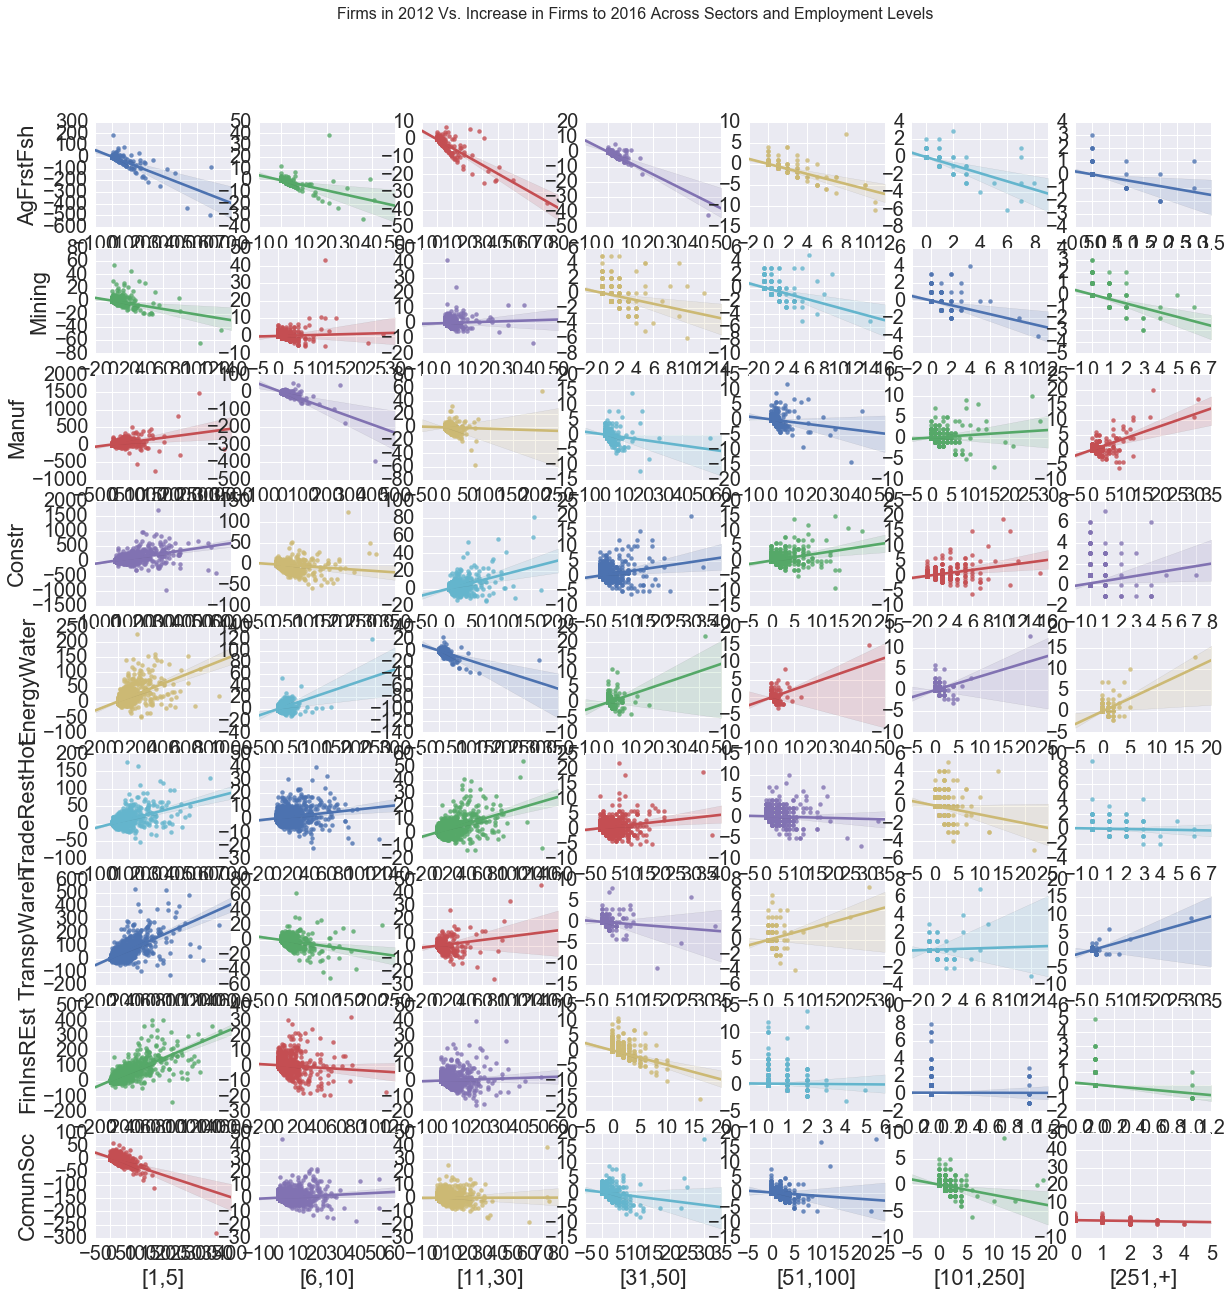

In [272]:
hm=h[h.ptot10cum<0.47]

fig, axes = plt.subplots(9,7,figsize=(20,20))

fig.suptitle("Firms in 2012 Vs. Increase in Firms to 2016 Across Sectors and Employment Levels", fontsize=16)
for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        aaa=hm[(hm.Sector==sss)&(hm.EmpLevel==eee)]
        sns.regplot(x=aaa.firmas12, y=aaa.firmasdif,ax = axes[ss,ee])
        sns.plt.xlim(0,)
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()

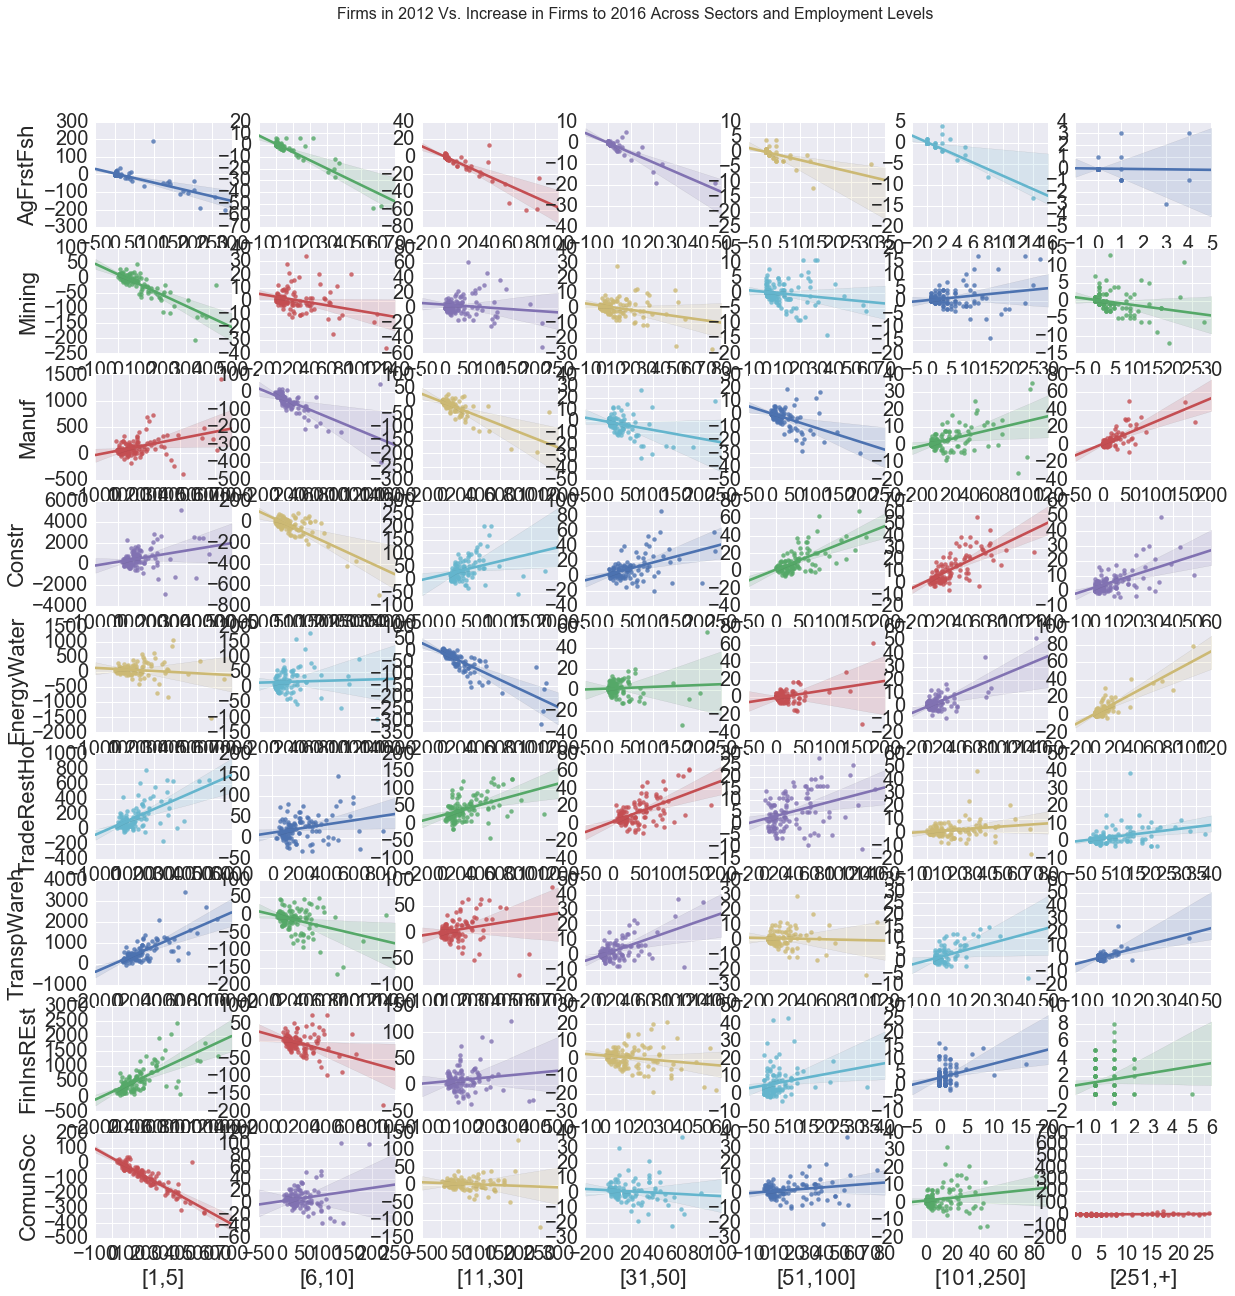

In [275]:
hm=h[(h.ptot10cum>=0.47)]
#&(h.ptot10cum<0.87)

fig, axes = plt.subplots(9,7,figsize=(20,20))

fig.suptitle("Firms in 2012 Vs. Increase in Firms to 2016 Across Sectors and Employment Levels", fontsize=16)
for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        aaa=hm[(hm.Sector==sss)&(hm.EmpLevel==eee)]
        if len(aaa)>0 :
            sns.regplot(x=aaa.firmas12, y=aaa.firmasdif,ax = axes[ss,ee])
            sns.plt.xlim(0,)
            axes[ss,ee].set_xlabel('')
            axes[ss,ee].set_ylabel('')

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()

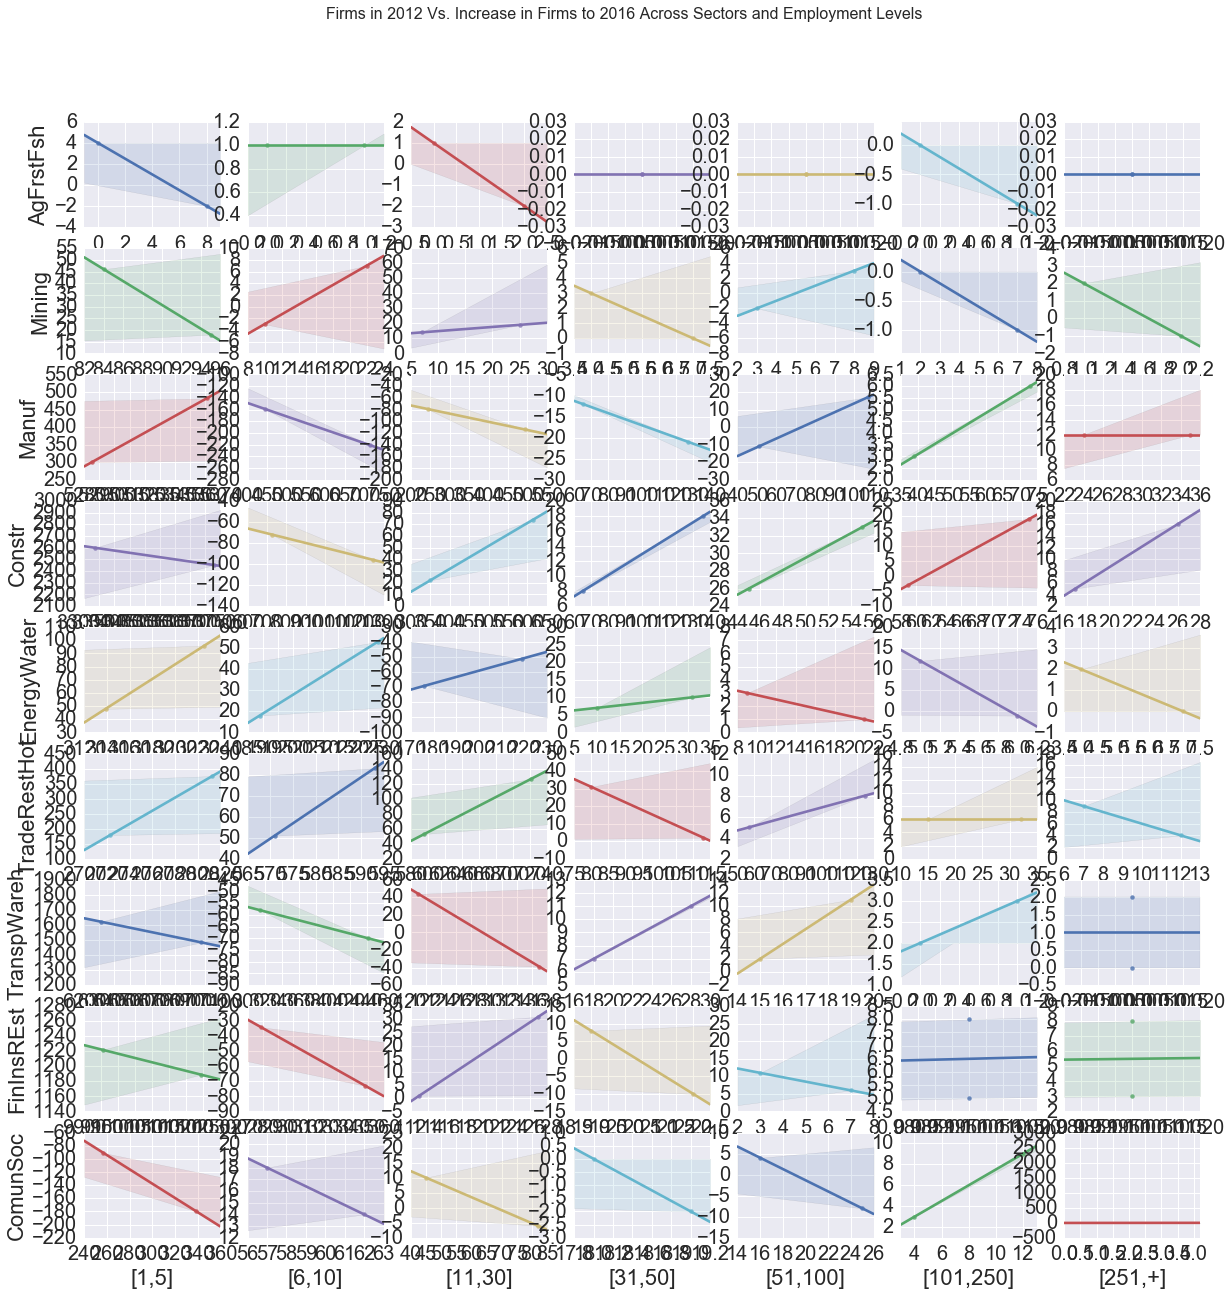

In [274]:
hm=h[(h.ptot10cum>=0.97)]

fig, axes = plt.subplots(9,7,figsize=(20,20))

fig.suptitle("Firms in 2012 Vs. Increase in Firms to 2016 Across Sectors and Employment Levels", fontsize=16)
for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        aaa=hm[(hm.Sector==sss)&(hm.EmpLevel==eee)]
        sns.regplot(x=aaa.firmas12, y=aaa.firmasdif,ax = axes[ss,ee])
        sns.plt.xlim(0,)
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()

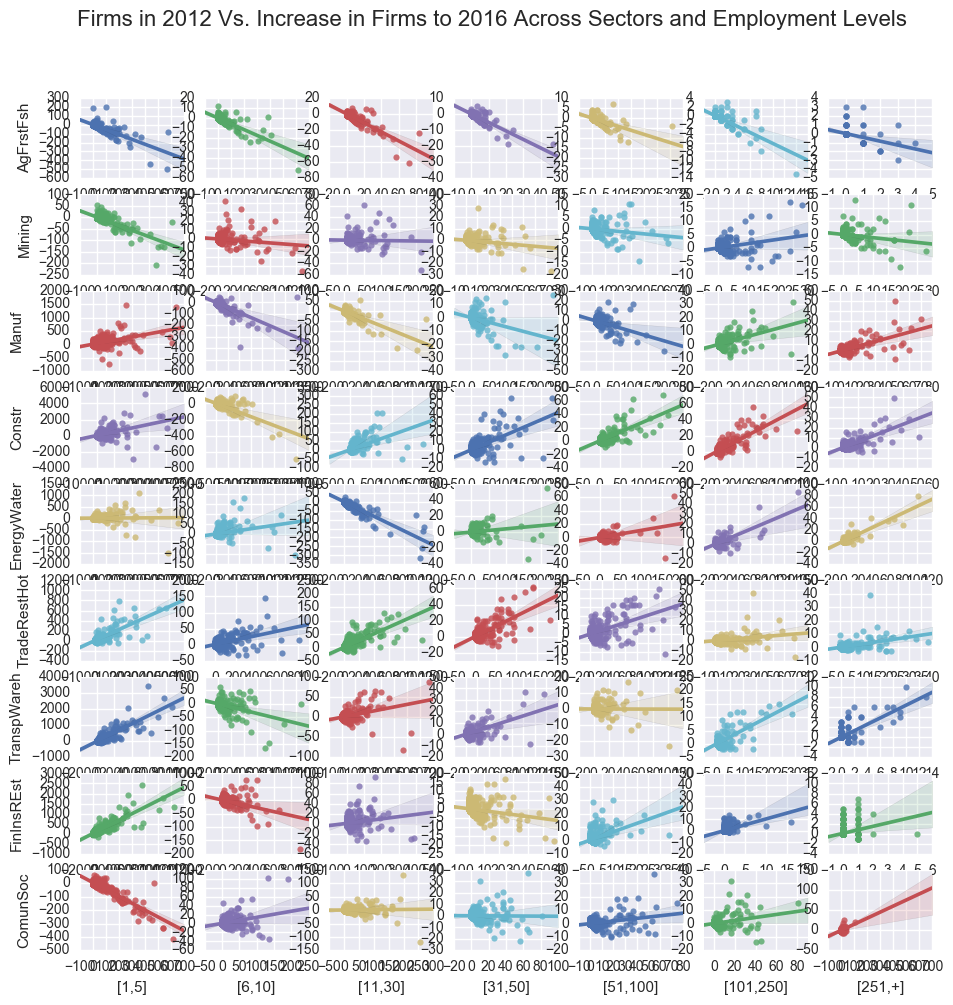

In [36]:
hm=h[h.nacotrent10<25]

fig, axes = plt.subplots(9,7,figsize=(20,20))

fig.suptitle("Firms in 2012 Vs. Increase in Firms to 2016 Across Sectors and Employment Levels", fontsize=16)
for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        aaa=hm[(hm.Sector==sss)&(hm.EmpLevel==eee)]
        sns.regplot(x=aaa.firmas12, y=aaa.firmasdif,ax = axes[ss,ee])
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()

DE AQUI PARA ABAJO YA NO

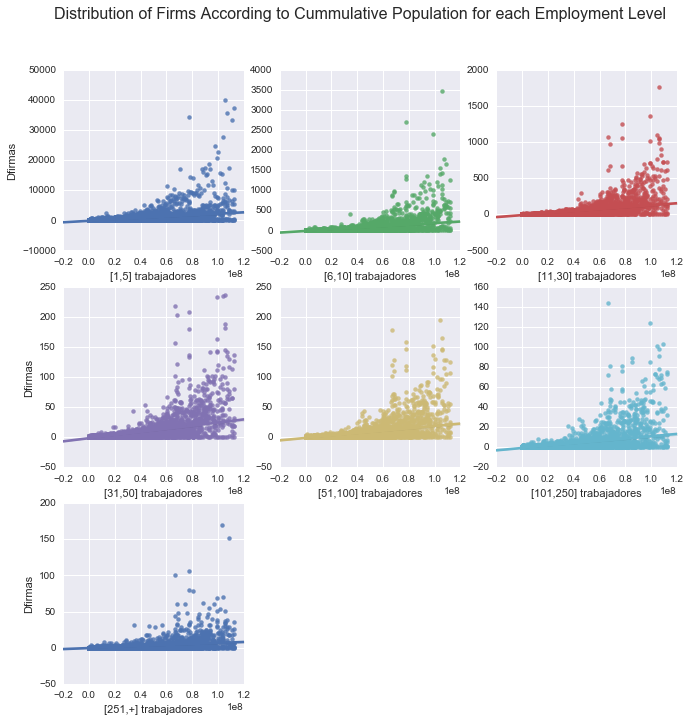

In [64]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Distribution of Firms According to Cummulative Population for each Employment Level", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].ptot10cum, y=hm[(hm.EmpLevel==1)].firmas12,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].ptot10cum, y=hm[(hm.EmpLevel==2)].firmas12,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].ptot10cum, y=hm[(hm.EmpLevel==3)].firmas12,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].ptot10cum, y=hm[(hm.EmpLevel==4)].firmas12,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].ptot10cum, y=hm[(hm.EmpLevel==5)].firmas12,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].ptot10cum, y=hm[(hm.EmpLevel==6)].firmas12,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].ptot10cum, y=hm[(hm.EmpLevel==7)].firmas12,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

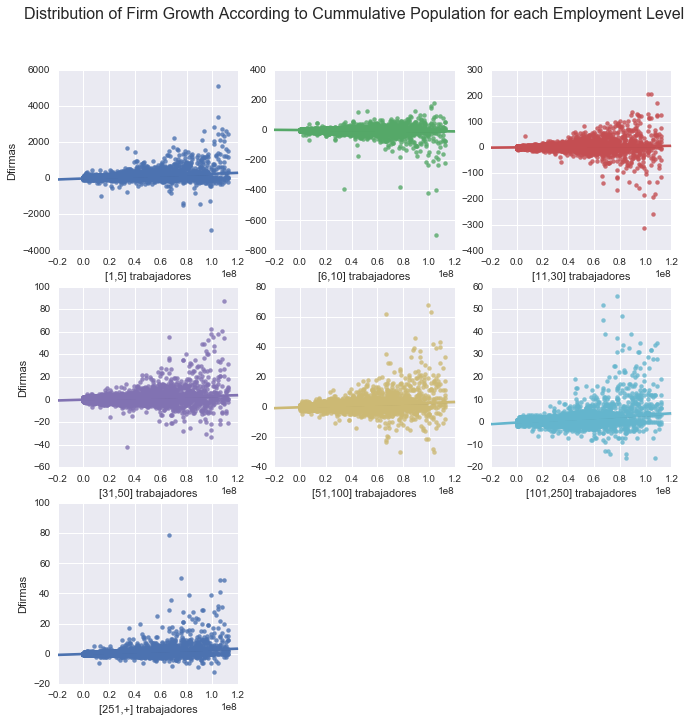

In [66]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20)) 
fig.suptitle("Distribution of Firm Growth According to Cummulative Population for each Employment Level", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].ptot10cum, y=hm[(hm.EmpLevel==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].ptot10cum, y=hm[(hm.EmpLevel==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].ptot10cum, y=hm[(hm.EmpLevel==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].ptot10cum, y=hm[(hm.EmpLevel==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].ptot10cum, y=hm[(hm.EmpLevel==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].ptot10cum, y=hm[(hm.EmpLevel==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].ptot10cum, y=hm[(hm.EmpLevel==7)].firmasdif,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

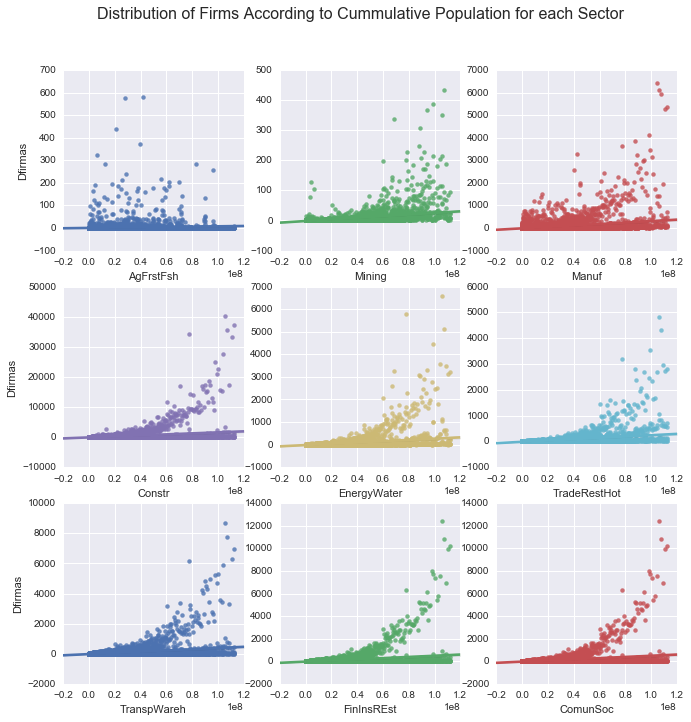

In [69]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Distribution of Firms According to Cummulative Population for each Sector", fontsize=16)
sns.regplot(x=hm[(hm.Sector==1)].ptot10cum, y=hm[(hm.Sector==1)].firmas12,ax=axes[0,0])        
sns.regplot(x=hm[(hm.Sector==2)].ptot10cum, y=hm[(hm.Sector==2)].firmas12,ax=axes[0,1])
sns.regplot(x=hm[(hm.Sector==3)].ptot10cum, y=hm[(hm.Sector==3)].firmas12,ax=axes[0,2])
sns.regplot(x=hm[(hm.Sector==4)].ptot10cum, y=hm[(hm.Sector==4)].firmas12,ax=axes[1,0])
sns.regplot(x=hm[(hm.Sector==5)].ptot10cum, y=hm[(hm.Sector==5)].firmas12,ax=axes[1,1])
sns.regplot(x=hm[(hm.Sector==6)].ptot10cum, y=hm[(hm.Sector==6)].firmas12,ax=axes[1,2])
sns.regplot(x=hm[(hm.Sector==7)].ptot10cum, y=hm[(hm.Sector==7)].firmas12,ax=axes[2,0])
sns.regplot(x=hm[(hm.Sector==8)].ptot10cum, y=hm[(hm.Sector==8)].firmas12,ax=axes[2,1])
sns.regplot(x=hm[(hm.Sector==9)].ptot10cum, y=hm[(hm.Sector==8)].firmas12,ax=axes[2,2])

axes[0,0].set_xlabel('AgFrstFsh')
axes[0,1].set_xlabel('Mining')
axes[0,2].set_xlabel('Manuf')
axes[1,0].set_xlabel('Constr')
axes[1,1].set_xlabel('EnergyWater')
axes[1,2].set_xlabel('TradeRestHot')
axes[2,0].set_xlabel('TranspWareh')
axes[2,1].set_xlabel('FinInsREst')
axes[2,2].set_xlabel('ComunSoc')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')
axes[2,1].set_ylabel('')
axes[2,2].set_ylabel('')

plt.show()


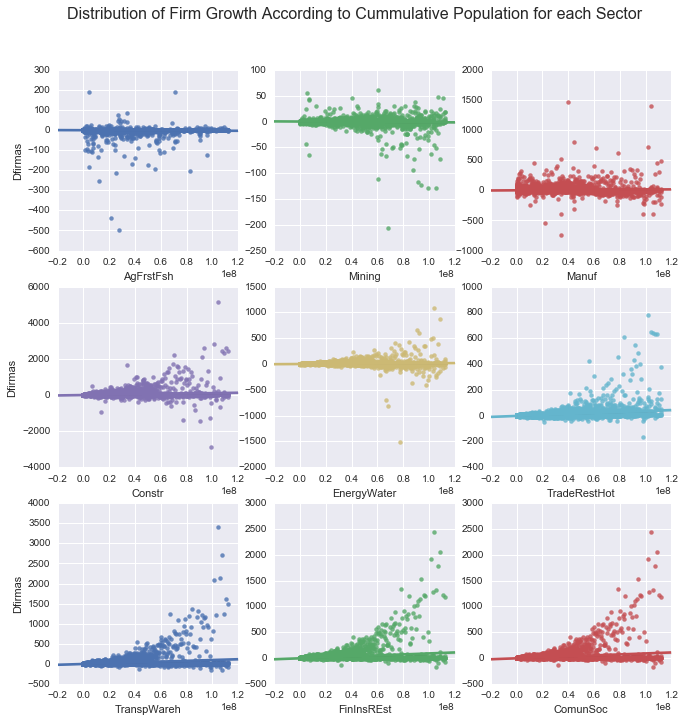

In [70]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Distribution of Firm Growth According to Cummulative Population for each Sector", fontsize=16)
sns.regplot(x=hm[(hm.Sector==1)].ptot10cum, y=hm[(hm.Sector==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.Sector==2)].ptot10cum, y=hm[(hm.Sector==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.Sector==3)].ptot10cum, y=hm[(hm.Sector==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.Sector==4)].ptot10cum, y=hm[(hm.Sector==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.Sector==5)].ptot10cum, y=hm[(hm.Sector==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.Sector==6)].ptot10cum, y=hm[(hm.Sector==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.Sector==7)].ptot10cum, y=hm[(hm.Sector==7)].firmasdif,ax=axes[2,0])
sns.regplot(x=hm[(hm.Sector==8)].ptot10cum, y=hm[(hm.Sector==8)].firmasdif,ax=axes[2,1])
sns.regplot(x=hm[(hm.Sector==9)].ptot10cum, y=hm[(hm.Sector==8)].firmasdif,ax=axes[2,2])

axes[0,0].set_xlabel('AgFrstFsh')
axes[0,1].set_xlabel('Mining')
axes[0,2].set_xlabel('Manuf')
axes[1,0].set_xlabel('Constr')
axes[1,1].set_xlabel('EnergyWater')
axes[1,2].set_xlabel('TradeRestHot')
axes[2,0].set_xlabel('TranspWareh')
axes[2,1].set_xlabel('FinInsREst')
axes[2,2].set_xlabel('ComunSoc')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')
axes[2,1].set_ylabel('')
axes[2,2].set_ylabel('')

plt.show()


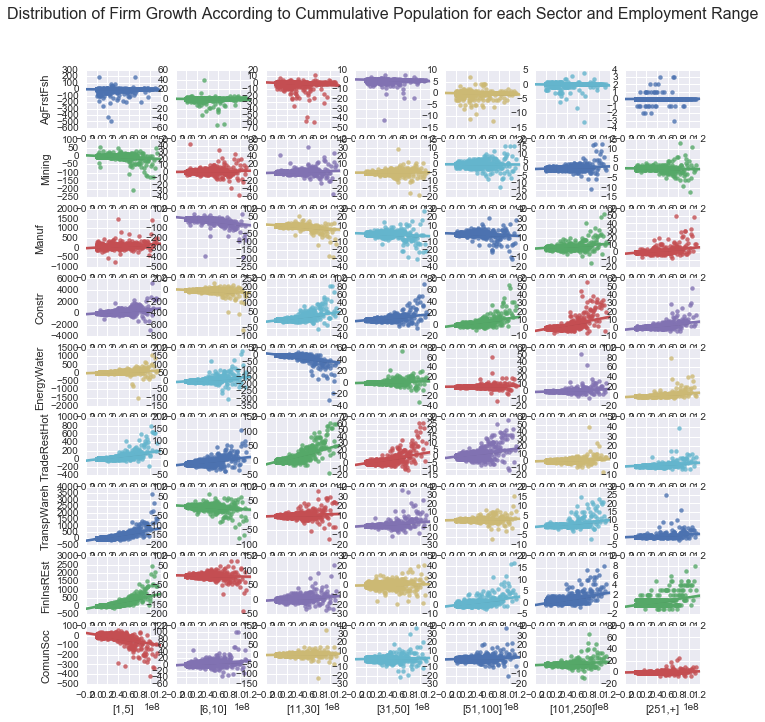

In [71]:
hm=h

fig, axes = plt.subplots(9,7,figsize=(20,20))

fig.suptitle("Distribution of Firm Growth According to Cummulative Population for each Sector and Employment Range", fontsize=16)
for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        aaa=hm[(hm.Sector==sss)&(hm.EmpLevel==eee)]
        sns.regplot(x=aaa.ptot10cum, y=aaa.firmasdif,ax = axes[ss,ee])
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()

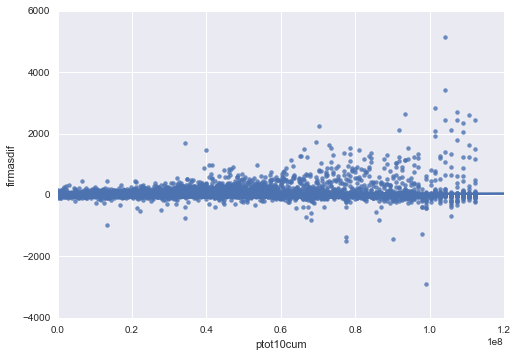

In [72]:
#plt.scatter([h.nacent10, h.ptot10])
sns.regplot(x=h.ptot10cum, y=h.firmasdif)
sns.plt.xlim(0,)
plt.show()


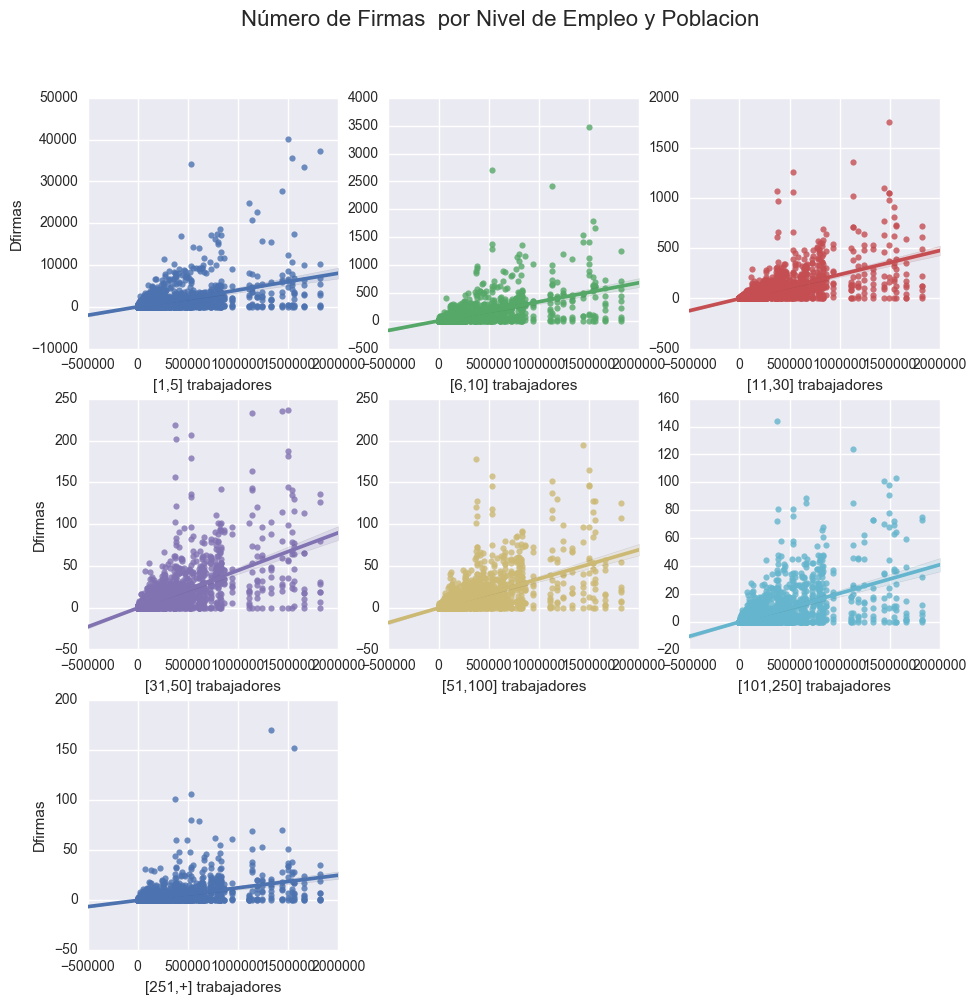

In [46]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Número de Firmas  por Nivel de Empleo y Poblacion", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].ptot10, y=hm[(hm.EmpLevel==1)].firmas12,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].ptot10, y=hm[(hm.EmpLevel==2)].firmas12,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].ptot10, y=hm[(hm.EmpLevel==3)].firmas12,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].ptot10, y=hm[(hm.EmpLevel==4)].firmas12,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].ptot10, y=hm[(hm.EmpLevel==5)].firmas12,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].ptot10, y=hm[(hm.EmpLevel==6)].firmas12,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].ptot10, y=hm[(hm.EmpLevel==7)].firmas12,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

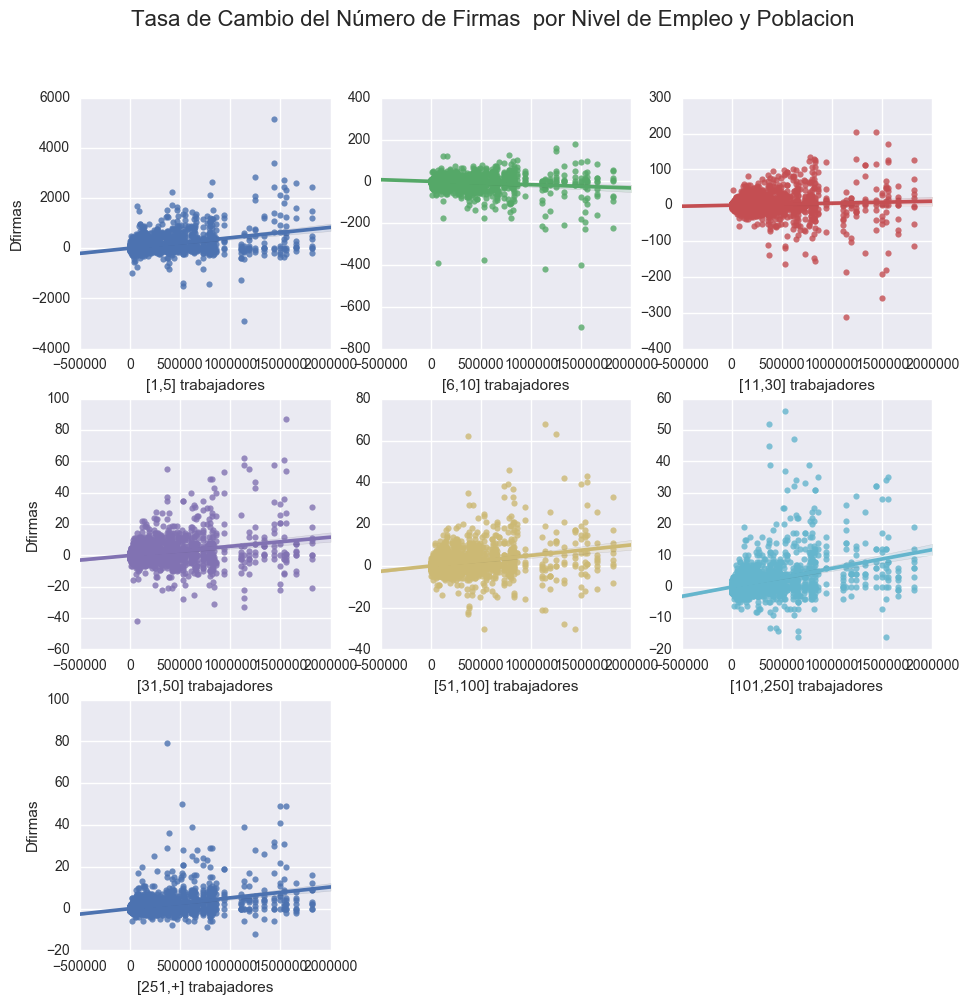

In [47]:
hm=h
fig, axes = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Tasa de Cambio del Número de Firmas  por Nivel de Empleo y Poblacion", fontsize=16)
sns.regplot(x=hm[(hm.EmpLevel==1)].ptot10, y=hm[(hm.EmpLevel==1)].firmasdif,ax=axes[0,0])        
sns.regplot(x=hm[(hm.EmpLevel==2)].ptot10, y=hm[(hm.EmpLevel==2)].firmasdif,ax=axes[0,1])
sns.regplot(x=hm[(hm.EmpLevel==3)].ptot10, y=hm[(hm.EmpLevel==3)].firmasdif,ax=axes[0,2])
sns.regplot(x=hm[(hm.EmpLevel==4)].ptot10, y=hm[(hm.EmpLevel==4)].firmasdif,ax=axes[1,0])
sns.regplot(x=hm[(hm.EmpLevel==5)].ptot10, y=hm[(hm.EmpLevel==5)].firmasdif,ax=axes[1,1])
sns.regplot(x=hm[(hm.EmpLevel==6)].ptot10, y=hm[(hm.EmpLevel==6)].firmasdif,ax=axes[1,2])
sns.regplot(x=hm[(hm.EmpLevel==7)].ptot10, y=hm[(hm.EmpLevel==7)].firmasdif,ax=axes[2,0])

axes[0,0].set_xlabel('[1,5] trabajadores')
axes[0,1].set_xlabel('[6,10] trabajadores')
axes[0,2].set_xlabel('[11,30] trabajadores')
axes[1,0].set_xlabel('[31,50] trabajadores')
axes[1,1].set_xlabel('[51,100] trabajadores')
axes[1,2].set_xlabel('[101,250] trabajadores')
axes[2,0].set_xlabel('[251,+] trabajadores')

axes[0,0].set_ylabel('Dfirmas')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('Dfirmas')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[2,0].set_ylabel('Dfirmas')

axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

In [76]:
hm=h
hm['dptot']=(hm.ptot15/hm.ptot10-1)/5
hm=hm[hm.dptot<0.2]
sns.regplot(x=hm.ptot10cum, y=hm.dptot,lowess=True)

entmun  Sector  EmpLevel  firmas12  firmas16    ptot10   im10    ptot15  \
0  1001.0     1.0       1.0       5.0        17  797010.0 -1.768  877190.0   
1  1001.0     1.0       2.0       4.0         0  797010.0 -1.768  877190.0   
2  1001.0     1.0       3.0       1.0         0  797010.0 -1.768  877190.0   
3  1001.0     1.0       4.0       1.0         0  797010.0 -1.768  877190.0   
4  1001.0     1.0       5.0       0.0         0  797010.0 -1.768  877190.0   

    im15   ptot10cum  nacent10  nacotrent10  pob5ymas10  vivotrent10  viveu10  \
0 -1.676  90924681.0      75.3         23.5        94.1          4.6      0.9   
1 -1.676  90924681.0      75.3         23.5        94.1          4.6      0.9   
2 -1.676  90924681.0      75.3         23.5        94.1          4.6      0.9   
3 -1.676  90924681.0      75.3         23.5        94.1          4.6      0.9   
4 -1.676  90924681.0      75.3         23.5        94.1          4.6      0.9   

     dptot  
0  0.02012  
1  0.02012  
2  0.02012  
3  0.02012  
4  0.02012

C:\Users\DavidMayerF\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


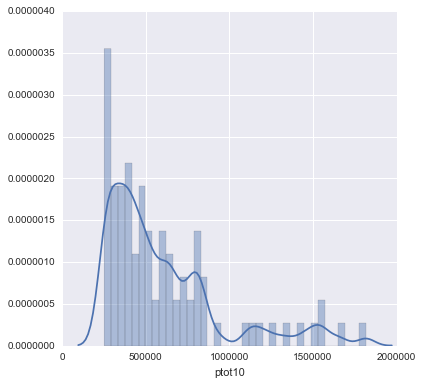

In [105]:
import seaborn as sns
hm=h
hm=hm[hm.ptot10>250000]
#sns.set(rc={"figure.figsize": (6, 6)})
ax=sns.distplot(hm.ptot10)
#ax.set_yscale='log'
plt.show()

C:\Users\DavidMayerF\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


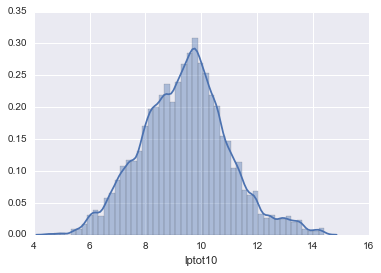

In [95]:
hm=h
hm['lptot10']=hm.ptot10.apply(lambda x: np.log(x))
#hm=hm[hm.ptot10>20000]
ax=sns.distplot(hm.lptot10)
#ax.set_yscale='log'
plt.show()